In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pwd

/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/

/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis


In [ ]:
# import shutil
# import os

# directory_path = '/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/'  # Change to your directory

# # Delete all contents but preserve the directory
# for filename in os.listdir(directory_path):
#     file_path = os.path.join(directory_path, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)
#     except Exception as e:
#         print(f'Failed to delete {file_path}. Reason: {e}')

# print(f"All contents in {directory_path} have been removed (directory preserved).")

All contents in /content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/ have been removed (directory preserved).


In [ ]:
!ls

 arima_forecast_base.png	     README.md
 arima_forecast_tuned.png	     stock_data.csv
 arima_model_base.pkl		     xgb_cm_base.png
 arima_model_tuned.pkl		     xgb_cm_tuned_cw.png
 best_lstm_tuned.pkl		     xgb_cm_tuned.png
 cm_lstm_tuned.png		     xgb_feature_importance_base.png
 lstm_base_cm.png		     xgb_feature_importance_tuned_cw.png
 lstm_base_history.png		     xgb_feature_importance_tuned.png
 lstm_tuning			     xgb_model_base.pkl
 mlruns				     xgb_tuned_model_cw.pkl
 model_lstm_base.pkl		     xgb_tuned_model_nf.pkl
 nvidia_stock_data.csv		     xgb_tuned_model.pkl
'nvidia stockmarketanalysis.ipynb'


In [ ]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define the stocks
primary_stock = 'NVDA'
competitor_stock = 'QUBT'
market_index = '^GSPC'
stocks = [primary_stock, competitor_stock, market_index]

In [ ]:
# Fetch historical data
start_date = '2010-01-02'
end_date = '2024-02-12'

In [ ]:
df = yf.download(stocks, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [ ]:
df.head()

Price          Close                          High                      \
Ticker          NVDA   QUBT        ^GSPC      NVDA   QUBT        ^GSPC   
Date                                                                     
2010-01-04  0.423884  190.0  1132.989990  0.426864  190.0  1133.869995   
2010-01-05  0.430073  220.0  1136.520020  0.434658  220.0  1136.630005   
2010-01-06  0.432824  194.0  1137.140015  0.433741  220.0  1139.189941   
2010-01-07  0.424342  200.0  1141.689941  0.432366  200.0  1142.459961   
2010-01-08  0.425259  190.0  1144.979980  0.428239  200.0  1145.390015   

Price            Low                          Open                      \
Ticker          NVDA   QUBT        ^GSPC      NVDA   QUBT        ^GSPC   
Date                                                                     
2010-01-04  0.415172  180.0  1116.560059  0.424342  190.0  1116.560059   
2010-01-05  0.422279  190.0  1129.660034  0.422279  190.0  1132.660034   
2010-01-06  0.425718  190.0  1133.949951  0.429844  220.0  1135.709961   
2010-01-07  0.421133  190.0  1131.319946  0.430532  194.0  1136.270020   
2010-01-08  0.418382  190.0  1136.219971  0.420903  200.0  1140.520020   

Price          Volume                   
Ticker           NVDA QUBT       ^GSPC  
Date                                    
2010-01-04  800204000   29  3991400000  
2010-01-05  728648000  212  2491020000  
2010-01-06  649168000   99  4972660000  
2010-01-07  547792000  137  5270680000  
2010-01-08  478168000   70  4389590000

In [ ]:
# 1. Flatten the MultiIndex columns
df.columns = [f"{col2}_{col1}" for col1, col2 in df.columns]

# 2. Rename S&P 500 symbol to something readable
df = df.rename(columns=lambda x: x.replace("^GSPC", "GSPC"))

# 3. Check the result
print(df.head())

            NVDA_Close  QUBT_Close   GSPC_Close  NVDA_High  QUBT_High  \
Date                                                                    
2010-01-04    0.423884       190.0  1132.989990   0.426864      190.0   
2010-01-05    0.430073       220.0  1136.520020   0.434658      220.0   
2010-01-06    0.432824       194.0  1137.140015   0.433741      220.0   
2010-01-07    0.424342       200.0  1141.689941   0.432366      200.0   
2010-01-08    0.425259       190.0  1144.979980   0.428239      200.0   

              GSPC_High  NVDA_Low  QUBT_Low     GSPC_Low  NVDA_Open  \
Date                                                                  
2010-01-04  1133.869995  0.415172     180.0  1116.560059   0.424342   
2010-01-05  1136.630005  0.422279     190.0  1129.660034   0.422279   
2010-01-06  1139.189941  0.425718     190.0  1133.949951   0.429844   
2010-01-07  1142.459961  0.421133     190.0  1131.319946   0.430532   
2010-01-08  1145.390015  0.418382     190.0  1136.219971   0.4

In [ ]:
df.shape

(3550, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3550 entries, 2010-01-04 to 2024-02-09
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NVDA_Close   3550 non-null   float64
 1   QUBT_Close   3550 non-null   float64
 2   GSPC_Close   3550 non-null   float64
 3   NVDA_High    3550 non-null   float64
 4   QUBT_High    3550 non-null   float64
 5   GSPC_High    3550 non-null   float64
 6   NVDA_Low     3550 non-null   float64
 7   QUBT_Low     3550 non-null   float64
 8   GSPC_Low     3550 non-null   float64
 9   NVDA_Open    3550 non-null   float64
 10  QUBT_Open    3550 non-null   float64
 11  GSPC_Open    3550 non-null   float64
 12  NVDA_Volume  3550 non-null   int64  
 13  QUBT_Volume  3550 non-null   int64  
 14  GSPC_Volume  3550 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 443.8 KB


In [ ]:
df.isnull().sum()

,0
NVDA_Close,0
QUBT_Close,0
GSPC_Close,0
NVDA_High,0
QUBT_High,0
GSPC_High,0
NVDA_Low,0
QUBT_Low,0
GSPC_Low,0
NVDA_Open,0


In [ ]:
df.describe()

,NVDA_Close,QUBT_Close,GSPC_Close,NVDA_High,QUBT_High,GSPC_High,NVDA_Low,QUBT_Low,GSPC_Low,NVDA_Open,QUBT_Open,GSPC_Open,NVDA_Volume,QUBT_Volume,GSPC_Volume
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3.550000e+03,3.550000e+03,3.550000e+03
mean,7.674762,7.000544,2553.315462,7.805099,7.493617,2566.621212,7.527095,6.434399,2537.891067,7.667463,7.023813,2552.708432,5.053042e+08,1.329900e+05,3.941416e+09
std,11.795556,23.551790,1085.735883,11.982188,24.995346,1091.801727,11.570861,21.669762,1079.042834,11.778029,23.725324,1085.482053,3.114963e+08,9.319602e+05,9.589124e+08
min,0.203574,0.015000,1022.580017,0.207472,0.015000,1032.949951,0.198301,0.015000,1010.909973,0.199906,0.015000,1027.650024,4.564400e+07,0.000000e+00,1.025000e+09
25%,0.393049,0.600000,1654.577515,0.399583,0.600000,1659.790039,0.385943,0.600000,1646.522491,0.392534,0.600000,1652.562531,3.087650e+08,0.000000e+00,3.365188e+09
50%,2.502516,2.600000,2274.979980,2.535195,2.750000,2279.180054,2.456274,2.490000,2266.414917,2.505969,2.600000,2272.319946,4.344320e+08,5.600000e+01,3.782310e+09
75%,10.580423,5.310000,3327.167480,10.751125,5.730000,3340.230042,10.385926,5.000000,3315.895081,10.559370,5.300000,3324.597412,6.126030e+08,3.190000e+04,4.315380e+09
max,72.105934,238.000000,5026.609863,72.157909,240.000000,5030.060059,70.185650,220.000000,5000.339844,70.506528,240.000000,5004.169922,3.692928e+09,3.033620e+07,1.061781e+10


### Feature Engineering

* Computing the stocks Return feature
* Creating a "tomorrow" column (next day's close price)
* Creating a "stocks-Direction" column (tomorrow's price > adj Close Price) : The direction column provides binary observations of daily price movements, indicating whether the stock price moved up or down (Target feature)

In [ ]:
# Calculate daily returns
df['NVDA_Return'] = df['NVDA_Close'].pct_change()
df['QUBT_Return'] = df['QUBT_Close'].pct_change()
df['GSPC_Return'] = df['GSPC_Close'].pct_change()

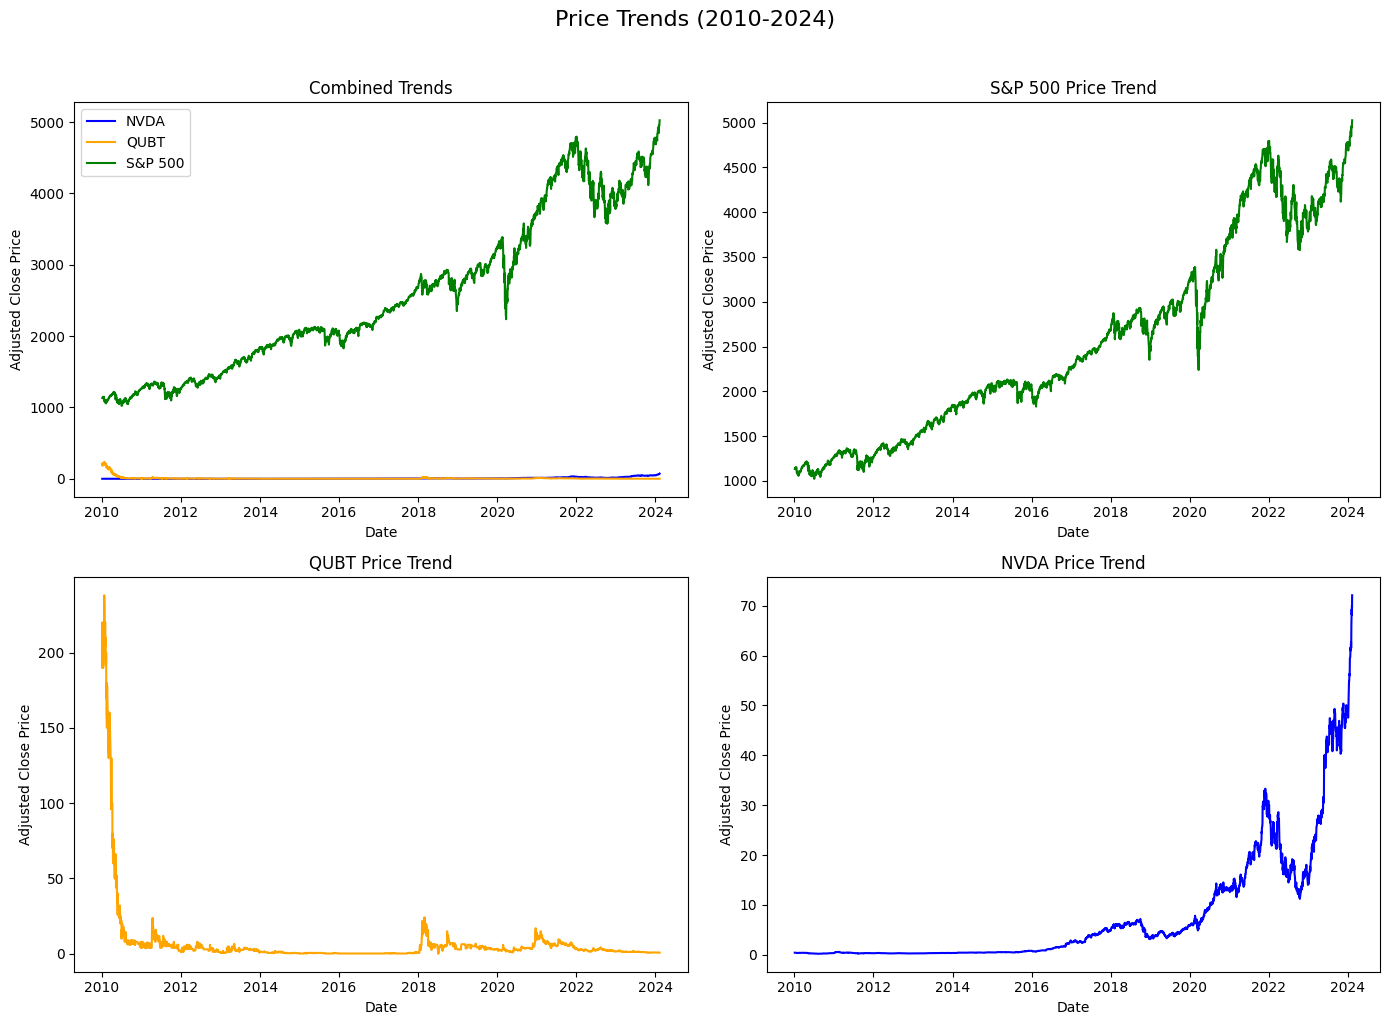

In [ ]:
import matplotlib.pyplot as plt

# Create figure and unpack axes into named variables
fig, ((ax_combined, ax_sp500), (ax_qubt, ax_nvda)) = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Price Trends (2010-2024)', fontsize=16, y=1.02)

# --- Plot 1: Combined Trends ---
ax_combined.plot(df.index, df['NVDA_Close'], label='NVDA', color='blue')
ax_combined.plot(df.index, df['QUBT_Close'], label='QUBT', color='orange')
ax_combined.plot(df.index, df['GSPC_Close'], label='S&P 500', color='green')
ax_combined.set_title('Combined Trends')
ax_combined.legend()

# --- Plot 2: S&P 500 ---
ax_sp500.plot(df.index, df['GSPC_Close'], color='green')
ax_sp500.set_title('S&P 500 Price Trend')

# --- Plot 3: QUBT ---
ax_qubt.plot(df.index, df['QUBT_Close'], color='orange')
ax_qubt.set_title('QUBT Price Trend')

# --- Plot 4: NVDA ---
ax_nvda.plot(df.index, df['NVDA_Close'], color='blue')
ax_nvda.set_title('NVDA Price Trend')

# Add common labels (optional)
for ax in [ax_combined, ax_nvda, ax_qubt, ax_sp500]:
    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted Close Price')
    ax.grid(False)

plt.tight_layout()
plt.show()

Findings:

Interpretation:

- S&P 500 (Green Line): The S&P 500 shows a generally upward trend over the entire period. While there are fluctuations and periods of stagnation or slight decline, the overall trajectory is positive, indicating consistent growth in the broad market.

- NVDA (Blue Line): NVDA's stock price starts relatively low and remains fairly stable until around 2016. After 2016, there is a significant and rapid increase in its price, continuing its upward trend with some volatility until 2024. This suggests substantial growth for NVDA, especially in the latter half of the observed period.

- QUBT (Orange Line): QUBT's stock price starts at a low level and experiences some fluctuations in the early years. However, it largely remains at a relatively low price point throughout the entire period from 2010 to 2024, with no significant long-term growth trend observed.
Key Findings:

- Strong Growth for NVDA: NVDA has experienced remarkable growth in its adjusted close price, particularly after 2016, significantly outperforming both the S&P 500 and QUBT in terms of percentage increase.
- Steady Growth for S&P 500: The S&P 500 demonstrates a consistent, albeit less dramatic than NVDA, upward trend, reflecting the overall growth of the market.
- Limited Growth for QUBT: QUBT's adjusted close price has remained relatively flat and low over the entire period, indicating a lack of significant long-term price appreciation compared to the other two.

In conclusion, over the period of 2010-2024, NVDA has been the standout performer in terms of stock price appreciation, followed by the steady growth of the S&P 500, while QUBT's stock price has shown minimal growth.


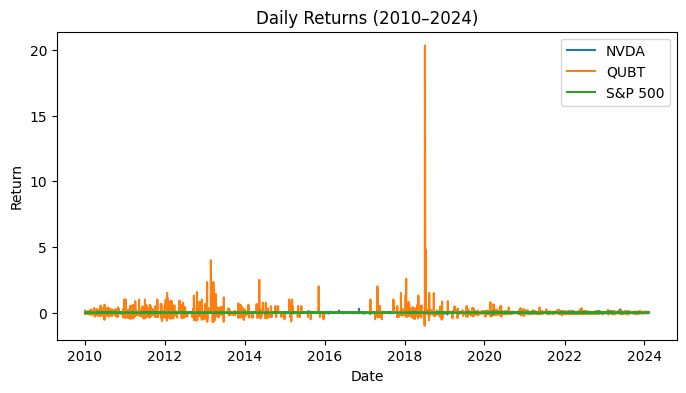

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['NVDA_Return'], label='NVDA')
plt.plot(df.index, df['QUBT_Return'], label='QUBT')
plt.plot(df.index, df['GSPC_Return'], label='S&P 500')
plt.title('Daily Returns (2010–2024)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(False)
plt.show()

### Key Findings:

- S&P 500:The daily returns for the S&P 500 appear to be consistently close to zero throughout the entire period, indicating relatively stable daily price movements.

- NVDA: NVDA's daily returns also generally hover around zero for most of the observed period. However, there are a few instances of significant positive spikes, particularly noticeable around 2016 and again in 2020 and 2022, suggesting periods of high positive growth.

- QUBT: QUBT exhibits the most volatile daily returns among the three. While it mostly stays near zero, there are numerous instances of both positive and negative spikes of varying magnitudes throughout the entire period, indicating higher daily price fluctuations compared to NVDA and the S&P 500. A particularly large positive spike is visible around 2019.


In summary, the S&P 500 shows the most stable daily returns, NVDA experiences occasional significant positive return spikes, and QUBT demonstrates the highest volatility with frequent and sometimes substantial positive and negative daily returns.

Findings:

Risk & Volatility Analysis
Here we’ll analyze how risky or stable each stock is by calculating:

Standard deviation of returns – higher means more volatile.

Rolling volatility (30-day window) – to see how risk changed over time.

Comparison to the S&P 500 – to benchmark performance and risk.

In [ ]:
print("NVDA Volatility:", df['NVDA_Return'].std())
print("QUBT Volatility:", df['QUBT_Return'].std())
print("S&P 500 Volatility:", df['GSPC_Return'].std())

NVDA Volatility: 0.028251079938894332
QUBT Volatility: 0.4064731429521332
S&P 500 Volatility: 0.011007459235443199


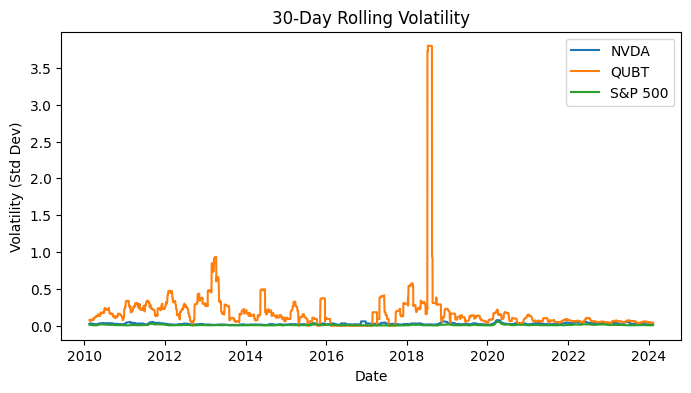

In [ ]:
# Rolling 30-day volatility
df['NVDA_RollingVol'] = df['NVDA_Return'].rolling(window=30).std()
df['QUBT_RollingVol'] = df['QUBT_Return'].rolling(window=30).std()
df['GSPC_RollingVol'] = df['GSPC_Return'].rolling(window=30).std()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['NVDA_RollingVol'], label='NVDA')
plt.plot(df.index, df['QUBT_RollingVol'], label='QUBT')
plt.plot(df.index, df['GSPC_RollingVol'], label='S&P 500')
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev)')
plt.legend()
plt.grid(False)
plt.show()

Interpretation:

- S&P 500 (Green Line): The 30-day rolling volatility of the S&P 500 generally remains below 0.5 throughout the period, indicating relatively low and stable volatility for the broad market. There are occasional minor spikes, particularly around 2011-2012 and 2020, likely corresponding to periods of market uncertainty.
- NVDA (Blue Line): NVDA's volatility is generally higher than the S&P 500. It shows several periods of increased volatility, notably in 2012-2013, 2016, and around 2020. The volatility seems to have decreased in the later part of the period.
- QUBT (Orange Line): QUBT exhibits the highest and most erratic volatility among the three. There are significant spikes in volatility around 2013-2014 and a very large spike around 2018-2019, indicating periods of high price fluctuations. Even outside these major spikes, QUBT's volatility tends to be higher than that of NVDA and the S&P 500.
Key Findings:

- Highest Volatility for QUBT: QUBT consistently shows the highest level of 30-day rolling volatility, suggesting it is the riskiest of the three assets based on this measure. The large spike around 2018-2019 indicates a period of particularly high uncertainty or rapid price changes.
- Moderate Volatility for NVDA: NVDA's volatility is generally higher than the S&P 500 but lower than QUBT. It experiences periods of increased volatility that could be linked to specific company events or market conditions.
- Lowest Volatility for S&P 500: The S&P 500 demonstrates the lowest and most stable 30-day rolling volatility, consistent with its nature as a broad market index representing a diversified portfolio of stocks.
In conclusion, the 30-day rolling volatility analysis suggests that QUBT has been the most volatile asset, followed by NVDA, while the S&P 500 has exhibited the most stable price movements over the period from 2010 to 2024. This implies that an investment in QUBT would have carried the highest level of short-term price risk during this period, while the S&P 500 would have been the least risky based on this metric.

In [ ]:
# Correlation with S&P 500
corr_nvidia = df['NVDA_Return'].corr(df['GSPC_Return'])
corr_ko = df['QUBT_Return'].corr(df['GSPC_Return'])

print(f"NVDA vs S&P 500 Correlation: {corr_nvidia:.4f}")
print(f"QUBT vs S&P 500 Correlation: {corr_ko:.4f}")

NVDA vs S&P 500 Correlation: 0.6260
QUBT vs S&P 500 Correlation: 0.0316


- NVDA vs S&P 500 Correlation: 0.6260

This indicates a positive correlation between the daily returns of NVDA and the S&P 500.
A correlation of 0.6260 suggests a moderately strong positive relationship. This means that, on average, when the S&P 500's daily returns go up, NVDA's daily returns also tend to go up, and vice versa. The relationship is not perfect (which would be a correlation of 1.0), but it is substantial.
- QUBT vs S&P 500 Correlation: 0.0316

This indicates a very weak positive correlation between the daily returns of QUBT and the S&P 500.
A correlation of 0.0316 is very close to zero, suggesting almost no linear relationship between the daily returns of QUBT and the S&P 500. The movements in QUBT's daily returns are largely independent of the movements in the S&P 500's daily returns.
Key Findings:

- NVDA's returns are moderately correlated with the broad market: NVDA's stock price movements, in terms of daily returns, have a noticeable tendency to follow the general trend of the broader market, as represented by the S&P 500.
- QUBT's returns show almost no correlation with the broad market: QUBT's daily returns appear to be largely independent of the overall market movements. This suggests that QUBT's price fluctuations are likely driven by factors specific to the company or its sector, rather than broad market trends.




In [ ]:
import statsmodels.api as sm

# For NVDA
X_nvidia = df['GSPC_Return']
y_nvidia = df['NVDA_Return']
X_nvidia = sm.add_constant(X_nvidia)  # Adds intercept
model_nvidia = sm.OLS(y_nvidia, X_nvidia, missing='drop').fit()

# For QUBT
X_ko = df['GSPC_Return']
y_ko = df['QUBT_Return']
X_ko = sm.add_constant(X_ko)
model_ko = sm.OLS(y_ko, X_ko, missing='drop').fit()

print("NVDA Regression Summary:")
print(model_nvidia.summary())

print("\nQUBT Regression Summary:")
print(model_ko.summary())

NVDA Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            NVDA_Return   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     2286.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:19:20   Log-Likelihood:                 8505.4
No. Observations:                3549   AIC:                        -1.701e+04
Df Residuals:                    3547   BIC:                        -1.699e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0011   

This analysis uses a statistical technique called regression to understand how the daily returns of NVDA and QUBT are related to the daily returns of the S&P 500, which represents the overall stock market. Think of it like trying to see how much these individual stocks move up or down when the whole market moves.

Here's a breakdown of what the results mean for each stock:

-  NVDA Regression Summary:

R-squared: 0.392: This number tells us how much of NVDA's daily return can be explained by the movement of the S&P 500. In this case, about 39.2% of NVDA's daily price changes are linked to what's happening in the broader market. This suggests that while the market plays a significant role, other factors also influence NVDA's stock price.
Coefficient for GSPC_Return: 1.6068: This is a key number. It means that for every 1% change in the S&P 500's daily return, NVDA's daily return tends to change by approximately 1.61% in the same direction. This indicates that NVDA's stock price is more sensitive to market movements than the market itself (it's more volatile relative to the S&P 500).
P>|t| (P-value): 0.000: This very small number (close to zero) indicates that the relationship between NVDA's returns and the S&P 500's returns is statistically significant and not just due to random chance. We can be quite confident that this relationship exists.
In simpler terms for NVDA: When the market goes up, NVDA tends to go up by a larger percentage, and when the market goes down, NVDA tends to go down by a larger percentage. About 39% of NVDA's daily price swings can be attributed to overall market movements.

- QUBT Regression Summary:

R-squared: 0.001: This number is very low (0.1%). It means that only a tiny fraction (0.1%) of QUBT's daily return can be explained by the movement of the S&P 500. This indicates that QUBT's stock price movements are almost entirely independent of the broader market.
Coefficient for GSPC_Return: 1.1680: While the coefficient is around 1.17, given the very low R-squared and the next point, we need to be cautious about its interpretation. It suggests that for every 1% change in the S&P 500, QUBT might tend to move by about 1.17%, but this relationship is very weak.
P>|t| (P-value): 0.060: This value is slightly above the common threshold of 0.05. This suggests that the relationship between QUBT's returns and the S&P 500's returns is not statistically significant at the typical confidence level. We cannot be very confident that there is a real, consistent linear relationship between them based on this data.
In simpler terms for QUBT: QUBT's daily price movements appear to have very little to do with how the overall stock market is performing. Its price seems to be driven by factors other than general market trends.

- Overall Takeaway for Stakeholders:

NVDA is influenced by the market: NVDA's performance is linked to the broader market's performance, and it tends to be more sensitive to market swings.
QUBT moves independently of the market: QUBT's performance seems to be driven by factors specific to the company or its industry, rather than the general stock market trends. This could make it a potentially more diversified investment compared to the broad market, but also potentially more volatile due to company-specific risks

In [ ]:
# !pip install requests beautifulsoup4 lxml
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_macrotrends_table(stock_symbol, metric_name):
    # 1. Build the kitchen address (URL) — like saying where to get the cookies
    base_url = f"https://www.macrotrends.net/stocks/charts/{stock_symbol}/NVIDIA/{metric_name}"

    # 2. Send a robot (browser request) to open the page
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(base_url, headers=headers)

    # 3. look inside the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'lxml')

    # 4. Find the table that holds the financial cookies
    table = soup.find('table', class_='historical_data_table table')

    if table is None:
        print("Oops! Table not found for:", metric_name)
        return None

    # 5. Collect all the rows of data
    rows = table.find_all('tr')
    data = []

    for row in rows[1:]:  # skip the header row
        cols = row.find_all('td')
        if len(cols) == 2:
            year = cols[0].text.strip()
            value = cols[1].text.strip().replace('$','').replace(',','')
            try:
                data.append([int(year), float(value)])
            except:
                continue

    # 6. Put them into a DataFrame
    df = pd.DataFrame(data, columns=["Year", metric_name.replace("-", "_").title()])
    return df


In [ ]:
def scrape_multiple_metrics(stock_symbol, metrics):
    all_data = None

    for metric in metrics:
        print(f"Fetching {metric}...")
        df = scrape_macrotrends_table(stock_symbol, metric)
        if df is not None:
            if all_data is None:
                all_data = df
            else:
                all_data = pd.merge(all_data, df, on="Year", how="outer")

    # Sort years and clean up
    if all_data is not None:
        all_data = all_data.sort_values("Year").reset_index(drop=True)
    return all_data

metrics = [
    "revenue",
    "net-income",
    "gross-profit",
    "total-assets",
    "total-liabilities"
]


df_fundamental = scrape_multiple_metrics("NVDA", metrics)
df_fundamental.set_index("Year", inplace=True)

Fetching revenue...
Fetching net-income...
Fetching gross-profit...
Fetching total-assets...
Fetching total-liabilities...


In [ ]:
df_fundamental.to_csv('/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/stock_financials.csv',
          index=True,
          index_label='Year')

In [ ]:
df_fundamental.head(1)

,Revenue,Net_Income,Gross_Profit,Total_Assets,Total_Liabilities
Year,,,,,
2009,3425.0,-30.0,1174.0,3351.0,956.0


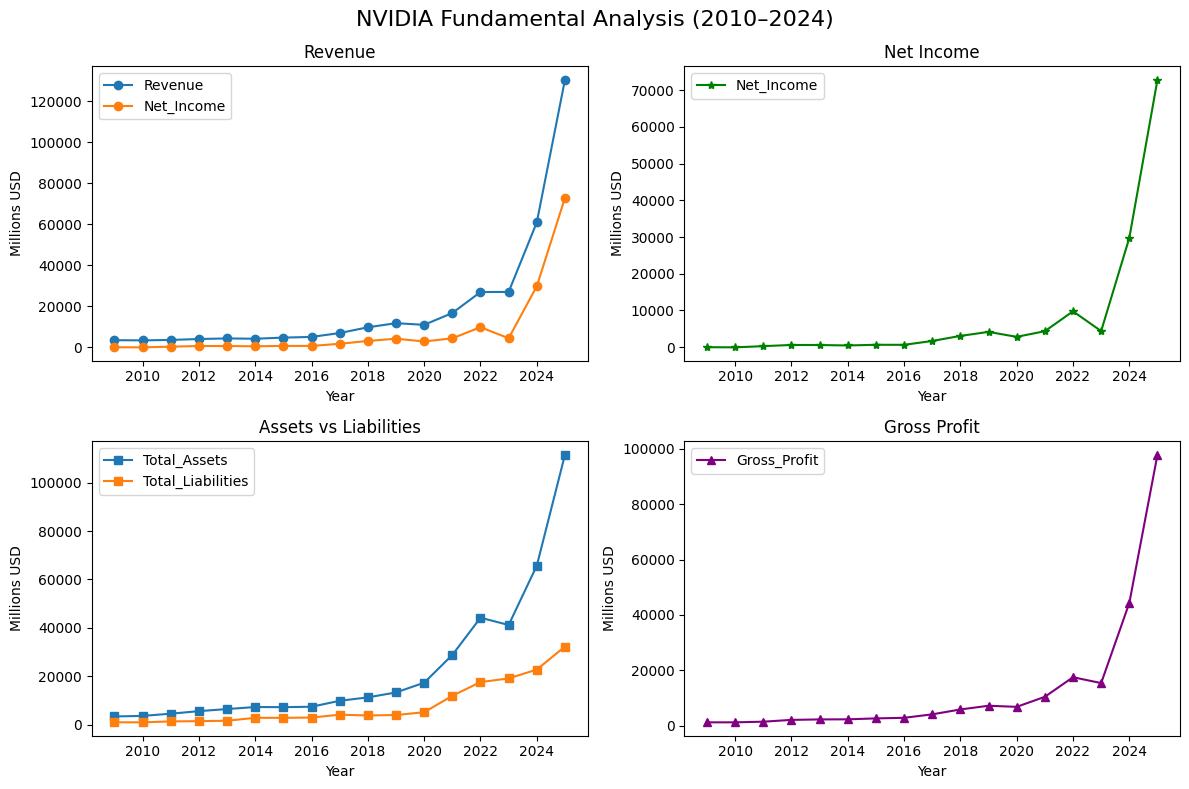

In [ ]:
import matplotlib.pyplot as plt

# Create 2x2 grid (total size 12x8 to keep ~6x4 per subplot)
fig, ((rev_ax, income_ax), (assets_ax, profit_ax)) = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle("NVIDIA Fundamental Analysis (2010–2024)", fontsize=16)  # <--

# --- Top Row ---
df_fundamental[['Revenue', 'Net_Income']].plot(ax=rev_ax, marker='o', title="Revenue")
df_fundamental['Net_Income'].plot(ax=income_ax, color='green', marker='*', title="Net Income")

# --- Bottom Row ---
df_fundamental[['Total_Assets', 'Total_Liabilities']].plot(ax=assets_ax, marker='s', title="Assets vs Liabilities")
df_fundamental['Gross_Profit'].plot(ax=profit_ax, color='purple', marker='^', title="Gross Profit")

# Formatting (applied to all subplots)
for ax in (rev_ax, income_ax, assets_ax, profit_ax):
    ax.set_ylabel("Millions USD")
    ax.grid(False)
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

fundamental analysis of NVIDIA (NVDA) from 2010 to 2024, displaying trends in key financial metrics. Let's break down each of the four graphs:

1. Revenue and Net Income:

Revenue (Blue Line): Shows a generally increasing trend over the period, with a significant acceleration in growth starting around 2016. The revenue experiences substantial growth in the later years, particularly between 2020 and 2024, reaching the highest point in 2024.
Net Income (Orange Line): Follows a similar trend to revenue but with more pronounced growth in the later years. Net income remains relatively low until around 2016, after which it starts to increase. The growth becomes very steep after 2020, mirroring the revenue surge and indicating improved profitability.
2. Net Income (Separate View):

This graph provides a clearer view of NVIDIA's net income trend (Green Line). It confirms the substantial increase in net income, especially in the period between 2020 and 2024, highlighting a significant jump in profitability during these years.
3. Assets vs Liabilities:

Total Assets (Blue Line): Shows a consistent upward trend throughout the period, indicating that NVIDIA's asset base has been growing steadily. The growth appears to accelerate in the later years, likely driven by increased profitability and investments.
Total Liabilities (Orange Line): Also shows an increasing trend, but generally at a lower rate than total assets. The gap between total assets and total liabilities widens significantly over time, suggesting a strengthening financial position for NVIDIA.
4. Gross Profit:

This graph displays the trend of NVIDIA's gross profit (Purple Line). It shows a clear upward trajectory, with a significant increase starting around 2016 and a very sharp rise after 2020, aligning with the growth in revenue and net income. This indicates that NVIDIA has been increasingly efficient in its core operations, leading to higher profits from its sales.
Key Findings from the Fundamental Analysis:

Strong Revenue Growth: NVIDIA has experienced significant and accelerating revenue growth, particularly in the latter half of the analyzed period (2016-2024).
Surging Net Income: Net income has grown dramatically, especially after 2020, indicating a substantial increase in the company's profitability.
Growing Asset Base: NVIDIA's total assets have consistently increased, reflecting the company's expansion and investments.
Healthy Financial Position: The widening gap between total assets and total liabilities suggests a strengthening financial position and increased equity for NVIDIA.
Increasing Gross Profit: Gross profit has shown a strong upward trend, indicating improved efficiency in the company's core business operations.
In summary, the fundamental analysis of NVIDIA from 2010 to 2024 reveals a company experiencing strong and accelerating growth in its revenue, profitability, asset base, and overall financial health, especially in recent years. This positive trend in key financial metrics likely contributes to the stock price performance observed in the previous analyses

Based on the fundamental analysis chart, the significant growth in NVIDIA's financials, especially after 2016 and accelerating after 2020, can likely be attributed to several key shifts and factors in the technology landscape and NVIDIA's strategic positioning:

- The Rise of Artificial Intelligence (AI) and Machine Learning (ML): This is arguably the most significant driver. NVIDIA's Graphics Processing Units (GPUs), initially designed for gaming, have proven to be exceptionally well-suited for the parallel processing demands of AI and ML workloads. This has led to massive demand for NVIDIA's high-end GPUs in data centers and cloud computing environments used for training and deploying AI models.

- Growth in Data Centers and Cloud Computing: The increasing adoption of cloud services and the growing need for powerful computing infrastructure have fueled the demand for NVIDIA's data center GPUs. These GPUs are essential for accelerating various tasks beyond AI, including high-performance computing and data analytics.

- Continued Strength in the Gaming Market: While AI and data centers have become major growth engines, NVIDIA has maintained its strong position in the gaming industry. The demand for high-performance GPUs for PC gaming continues to be robust, contributing significantly to their revenue.

- Expansion into Professional Visualization: NVIDIA's Quadro series of GPUs caters to professionals in fields like design, architecture, and media creation. Growth in these industries and the increasing complexity of their workflows have likely contributed to revenue growth.

- Automotive Industry Initiatives: NVIDIA has been actively investing in the automotive sector, developing platforms for autonomous driving and in-car infotainment systems. While this might not be the primary driver of the explosive growth seen in the charts, it represents a significant long-term growth opportunity.

- The Cryptocurrency Boom (to some extent): While the impact has fluctuated, the demand for GPUs for cryptocurrency mining, particularly in certain periods, could have contributed to increased sales. However, this is generally considered a more volatile and less predictable factor compared to the others.

The Shift:

The key shift that propelled NVIDIA's growth was the transformation of GPUs from primarily a graphics rendering tool for gaming into a crucial component for high-performance computing, especially in the rapidly expanding fields of AI and data science. NVIDIA recognized this potential early on and strategically invested in developing hardware and software ecosystems (like CUDA) that made their GPUs the industry standard for these demanding workloads. This foresight and strategic positioning allowed them to capitalize on the AI revolution and experience the exponential growth reflected in their fundamental financials.

We will now build two models to predict Stock Direction (Up = 1, Down = 0):

XGBoost (Gradient Boosting ML Model)

LSTM (Deep Learning Model)

Steps for Modeling & Evaluation

️1.Prepare Data → Feature selection, Train-Test Split (80:20)

️2. Train XGBoost Model → Classical ML approach

️3. Train LSTM Model → Deep Learning approach

️4. Evaluate Models → Accuracy, Precision, Recall, F1-Score

Predicting Stock Price Trends (ARIMA, XGBoost, LSTM)
We’ll model NVDA stock direction — predicting whether the price will go up or down.

In [ ]:
!ls

### Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3550 entries, 2010-01-04 to 2024-02-09
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NVDA_Close       3550 non-null   float64
 1   QUBT_Close       3550 non-null   float64
 2   GSPC_Close       3550 non-null   float64
 3   NVDA_High        3550 non-null   float64
 4   QUBT_High        3550 non-null   float64
 5   GSPC_High        3550 non-null   float64
 6   NVDA_Low         3550 non-null   float64
 7   QUBT_Low         3550 non-null   float64
 8   GSPC_Low         3550 non-null   float64
 9   NVDA_Open        3550 non-null   float64
 10  QUBT_Open        3550 non-null   float64
 11  GSPC_Open        3550 non-null   float64
 12  NVDA_Volume      3550 non-null   int64  
 13  QUBT_Volume      3550 non-null   int64  
 14  GSPC_Volume      3550 non-null   int64  
 15  NVDA_Return      3549 non-null   float64
 16  QUBT_Return      3549 non-null   float64
 

In [ ]:
#Target Feature

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Create tomorrow's price and direction
df['NVDA_Tomorrow'] = df['NVDA_Close'].shift(-1)
df['NVDA_Direction'] = (df['NVDA_Tomorrow'] > df['NVDA_Close']).astype(int)

# Drop NaNs from the shift
df.dropna(subset=['NVDA_Direction'], inplace=True)

In [ ]:
df.isnull().sum()

,0
NVDA_Close,0
QUBT_Close,0
GSPC_Close,0
NVDA_High,0
QUBT_High,0
GSPC_High,0
NVDA_Low,0
QUBT_Low,0
GSPC_Low,0
NVDA_Open,0


In [ ]:
df.describe()

,NVDA_Close,QUBT_Close,GSPC_Close,NVDA_High,QUBT_High,GSPC_High,NVDA_Low,QUBT_Low,GSPC_Low,NVDA_Open,...,QUBT_Volume,GSPC_Volume,NVDA_Return,QUBT_Return,GSPC_Return,NVDA_RollingVol,QUBT_RollingVol,GSPC_RollingVol,NVDA_Tomorrow,NVDA_Direction
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,...,3.550000e+03,3.550000e+03,3549.000000,3549.000000,3549.000000,3520.000000,3520.000000,3520.000000,3549.000000,3550.000000
mean,7.674762,7.000544,2553.315462,7.805099,7.493617,2566.621212,7.527095,6.434399,2537.891067,7.667463,...,1.329900e+05,3.941416e+09,0.001843,0.020281,0.000481,0.026006,0.185084,0.009485,7.676805,0.527887
std,11.795556,23.551790,1085.735883,11.982188,24.995346,1091.801727,11.570861,21.669762,1079.042834,11.778029,...,9.319602e+05,9.589124e+08,0.028251,0.406473,0.011007,0.011086,0.362094,0.005736,11.796590,0.499292
min,0.203574,0.015000,1022.580017,0.207472,0.015000,1032.949951,0.198301,0.015000,1010.909973,0.199906,...,0.000000e+00,1.025000e+09,-0.187559,-0.995000,-0.119841,0.007597,0.000000,0.002247,0.203574,0.000000
25%,0.393049,0.600000,1654.577515,0.399583,0.600000,1659.790039,0.385943,0.600000,1646.522491,0.392534,...,0.000000e+00,3.365188e+09,-0.012097,-0.007692,-0.003862,0.018085,0.060858,0.006185,0.392935,0.000000
50%,2.502516,2.600000,2274.979980,2.535195,2.750000,2279.180054,2.456274,2.490000,2266.414917,2.505969,...,5.600000e+01,3.782310e+09,0.001652,0.000000,0.000659,0.023308,0.112394,0.007937,2.502763,1.000000
75%,10.580423,5.310000,3327.167480,10.751125,5.730000,3340.230042,10.385926,5.000000,3315.895081,10.559370,...,3.190000e+04,4.315380e+09,0.015534,0.000000,0.005698,0.031641,0.218539,0.011225,10.580609,1.000000
max,72.105934,238.000000,5026.609863,72.157909,240.000000,5030.060059,70.185650,220.000000,5000.339844,70.506528,...,3.033620e+07,1.061781e+10,0.298067,20.333333,0.093828,0.076619,3.800575,0.053740,72.105934,1.000000


In [ ]:
# First drop the single nulls in Return columns and Tomorrow
df = df.dropna(subset=['NVDA_Return', 'QUBT_Return', 'GSPC_Return', 'NVDA_Tomorrow'])

df['NVDA_RollingVol'] = df['NVDA_RollingVol'].fillna(df['NVDA_RollingVol'].median())
df['QUBT_RollingVol'] = df['QUBT_RollingVol'].fillna(df['QUBT_RollingVol'].median())
df['GSPC_RollingVol'] = df['GSPC_RollingVol'].fillna(df['GSPC_RollingVol'].median())

In [ ]:
df.isnull().sum()

,0
NVDA_Close,0
QUBT_Close,0
GSPC_Close,0
NVDA_High,0
QUBT_High,0
GSPC_High,0
NVDA_Low,0
QUBT_Low,0
GSPC_Low,0
NVDA_Open,0


In [ ]:
# Lag Features (for LSTM/ARIMA):
# Create lagged returns/volatility (e.g., NVDA_Return_lag1, NVDA_Return_lag2) to capture temporal patterns.
df['NVDA_Return_lag1'] = df['NVDA_Return'].shift(1)

# Rolling Statistics (for trend detection):
df['NVDA_MA_7'] = df['NVDA_Close'].rolling(window=7).mean()

<Axes: >

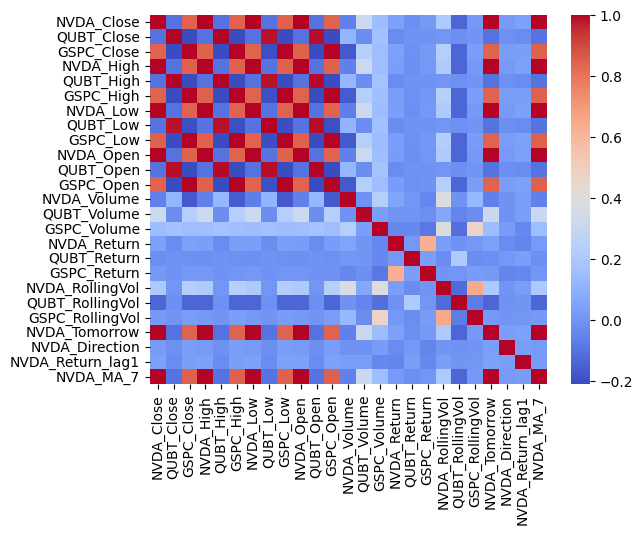

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [ ]:
import numpy as np

corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones_like(corr_matrix), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)
to_drop

['NVDA_High',
 'QUBT_High',
 'GSPC_High',
 'NVDA_Low',
 'QUBT_Low',
 'GSPC_Low',
 'NVDA_Open',
 'QUBT_Open',
 'GSPC_Open',
 'NVDA_Tomorrow',
 'NVDA_MA_7']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3548 entries, 2010-01-05 to 2024-02-08
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NVDA_Close        3548 non-null   float64
 1   QUBT_Close        3548 non-null   float64
 2   GSPC_Close        3548 non-null   float64
 3   NVDA_Volume       3548 non-null   int64  
 4   QUBT_Volume       3548 non-null   int64  
 5   GSPC_Volume       3548 non-null   int64  
 6   NVDA_Return       3548 non-null   float64
 7   QUBT_Return       3548 non-null   float64
 8   GSPC_Return       3548 non-null   float64
 9   NVDA_RollingVol   3548 non-null   float64
 10  QUBT_RollingVol   3548 non-null   float64
 11  GSPC_RollingVol   3548 non-null   float64
 12  NVDA_Direction    3548 non-null   int64  
 13  NVDA_Return_lag1  3547 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 415.8 KB


In [ ]:
# import os
# import shutil

# mlruns_path = "/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/mlruns"

# if os.path.exists(mlruns_path):
#     shutil.rmtree(mlruns_path)
#     print("✅ MLflow logs deleted successfully.")
# else:
#     print("ℹ️ No existing MLflow logs found. Skipping deletion.")

ℹ️ No existing MLflow logs found. Skipping deletion.


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis


In [ ]:
# !pip install mlflow --quiet

# import mlflow
# import os

# mlruns_path = "/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/mlruns"

# # Ensure the mlruns directory and .trash subdirectory exist
# os.makedirs(mlruns_path, exist_ok=True)  # Create mlruns if it doesn't exist
# os.makedirs(os.path.join(mlruns_path, ".trash"), exist_ok=True)  # Create .trash if it doesn't exist


# # Set tracking location to your GitHub project inside Google Drive
# mlflow.set_tracking_uri(mlruns_path)

# # Create/Set experiment
# mlflow.set_experiment("NVDA_Stock_Trend_Forecasting")

# print("MLflow is now set up and tracking in your Google Drive.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00


2025/04/07 22:28:52 INFO mlflow.tracking.fluent: Experiment with name 'NVDA_Stock_Trend_Forecasting' does not exist. Creating a new experiment.


MLflow is now set up and tracking in your Google Drive.


In [ ]:
!ls

mlruns


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis


In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/stock_data.csv',
#           index=True,
#           index_label='Date',
#           float_format='%.6f')

In [ ]:
df['NVDA_Direction'].value_counts()

,count
NVDA_Direction,
1,1873
0,1675


Step 9.2: ARIMA Model (Time Series)
ARIMA works best on the actual price — we’ll forecast the next price and derive direction from it.

In [ ]:
!ls

mlruns	stock_data.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3548 entries, 2010-01-05 to 2024-02-08
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NVDA_Close        3548 non-null   float64
 1   QUBT_Close        3548 non-null   float64
 2   GSPC_Close        3548 non-null   float64
 3   NVDA_Volume       3548 non-null   int64  
 4   QUBT_Volume       3548 non-null   int64  
 5   GSPC_Volume       3548 non-null   int64  
 6   NVDA_Return       3548 non-null   float64
 7   QUBT_Return       3548 non-null   float64
 8   GSPC_Return       3548 non-null   float64
 9   NVDA_RollingVol   3548 non-null   float64
 10  QUBT_RollingVol   3548 non-null   float64
 11  GSPC_RollingVol   3548 non-null   float64
 12  NVDA_Direction    3548 non-null   int64  
 13  NVDA_Return_lag1  3547 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 415.8 KB


In [ ]:
# 1. Handle missing values (just the one in NVDA_Return_lag1)
df.dropna(inplace=True)  # Now 3547 rows

### NVDA Stock Trend Forecasting - Structured Implementation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report

# Ensure index is proper datetime (you already have this)
df.index = pd.to_datetime(df.index)

# 2. Feature selection - focus on relevant features
features = [
    'NVDA_Close', 'GSPC_Close',         # Market prices
    'NVDA_Volume', 'GSPC_Volume',       # Trading activity
    'NVDA_Return', 'GSPC_Return',       # Daily returns
    'NVDA_RollingVol', 'GSPC_RollingVol', # Volatility
    'NVDA_Return_lag1'                  # Lagged returns
]

# 3. Time-series split (last 20% as test)
test_size = int(0.2 * len(df))
X_train, X_test = df[features][:-test_size], df[features][-test_size:]
y_train, y_test = df['NVDA_Direction'][:-test_size], df['NVDA_Direction'][-test_size:]

# 4. Scaling (different approaches for different models)
# For XGBoost - no scaling needed (but we'll create scaled versions for LSTM)
scaler = MinMaxScaler()  # Or StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Prepare data for different models:

# XGBoost format (using original unscaled data)
X_train_xgb, X_test_xgb = X_train, X_test

# LSTM format - reshape to 3D [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ARIMA format - univariate series (using returns or prices)
arima_train = df['NVDA_Return'][:-test_size]  # Or use NVDA_Close
arima_test = df['NVDA_Return'][-test_size:]

print("Data Preparation Complete!")
print(f"XGBoost shapes - Train: {X_train_xgb.shape}, Test: {X_test_xgb.shape}")
print(f"LSTM shapes - Train: {X_train_lstm.shape}, Test: {X_test_lstm.shape}")
print(f"ARIMA series length - Train: {len(arima_train)}, Test: {len(arima_test)}")

Data Preparation Complete!
XGBoost shapes - Train: (2838, 9), Test: (709, 9)
LSTM shapes - Train: (2838, 1, 9), Test: (709, 1, 9)
ARIMA series length - Train: 2838, Test: 709


In [ ]:
df_stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/stock_data.csv')
df_stock.describe()

,NVDA_Close,QUBT_Close,GSPC_Close,NVDA_Volume,QUBT_Volume,GSPC_Volume,NVDA_Return,QUBT_Return,GSPC_Return,NVDA_RollingVol,QUBT_RollingVol,GSPC_RollingVol,NVDA_Direction,NVDA_Return_lag1
count,3548.000000,3548.000000,3548.000000,3.548000e+03,3.548000e+03,3.548000e+03,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3547.000000
mean,7.658645,6.950728,2553.018684,5.052405e+08,1.328749e+05,3.941410e+09,0.001834,0.020281,0.000479,0.025985,0.184531,0.009473,0.527903,0.001836
std,11.748537,23.356897,1084.985556,3.115426e+08,9.321759e+05,9.591822e+08,0.028249,0.406530,0.011009,0.011044,0.360714,0.005715,0.499291,0.028253
min,0.203574,0.015000,1022.580017,4.564400e+07,0.000000e+00,1.025000e+09,-0.187559,-0.995000,-0.119841,0.007597,0.000000,0.002247,0.000000,-0.187559
25%,0.392820,0.600000,1654.912476,3.087320e+08,0.000000e+00,3.364878e+09,-0.012099,-0.007707,-0.003864,0.018111,0.060858,0.006195,0.000000,-0.012102
50%,2.502517,2.600000,2274.979981,4.342940e+08,5.600000e+01,3.781450e+09,0.001645,0.000000,0.000654,0.023311,0.112394,0.007938,1.000000,0.001652
75%,10.580051,5.310000,3326.082519,6.125850e+08,3.170000e+04,4.315695e+09,0.015519,0.000000,0.005694,0.031539,0.218335,0.011201,1.000000,0.015524
max,70.072685,238.000000,4997.910156,3.692928e+09,3.033620e+07,1.061781e+10,0.298067,20.333333,0.093828,0.076619,3.800575,0.053740,1.000000,0.298067


## ARIMA Modeling

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import mlflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

def run_arima_base(arima_train, arima_test, run_name="ARIMA_Base"):
    """Base ARIMA modeling"""

    # 1. Stationarity Check (using NVDA_Return)
    adf_result = adfuller(arima_train)
    print(f"ADF p-value: {adf_result[1]:.4f}")  # If >0.05, differencing needed

    # 2. Model Training - ARIMA(1,1,1) as baseline
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ValueWarning)
        model = sm.tsa.ARIMA(arima_train, order=(1,1,1)).fit()

    # 3. Forecasting
    forecast = model.get_forecast(steps=len(arima_test))
    y_pred = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # 4. MLflow Logging (enhanced)
    with mlflow.start_run(run_name=run_name):
        # Parameters
        mlflow.log_params({
            "model_type": "ARIMA",
            "p": 1,
            "d": 1,
            "q": 1,
            "is_stationary": adf_result[1] <= 0.05,
            "target": "NVDA_Return"  # Matches your preprocessing
        })

        # Metrics
        mlflow.log_metrics({
            "mae": mean_absolute_error(arima_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(arima_test, y_pred)),
            "aic": model.aic,
            "bic": model.bic,
            "direction_accuracy": accuracy_score(
                (arima_test.diff().dropna() > 0),
                (pd.Series(y_pred).diff().dropna() > 0)
            )
        })

        # Artifacts
        model.save("arima_model_base.pkl")  # statsmodels native save
        mlflow.log_artifact("arima_model_base.pkl")

        # Visualizations
        fig, ax = plt.subplots(figsize=(12,6))
        ax.plot(arima_train.index[-100:], arima_train[-100:], label='Training')
        ax.plot(arima_test.index, arima_test, label='Actual', color='blue')
        ax.plot(arima_test.index, y_pred, label='Forecast', color='red')
        ax.fill_between(conf_int.index,
                       conf_int.iloc[:,0],
                       conf_int.iloc[:,1],
                       color='gray', alpha=0.2)
        ax.set_title(f"ARIMA(1,1,1) Forecast\nTest MAE: {mean_absolute_error(arima_test, y_pred):.4f}")
        ax.legend()
        plt.savefig("arima_forecast_base.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("arima_forecast_base.png")
        plt.close()

    return model, y_pred

# Usage (matches your preprocessed data):
arima_model_base, y_pred_arima_base = run_arima_base(arima_train, arima_test)

ADF p-value: 0.0000


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## XGBoost Modeling

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import joblib
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

def run_xgboost_base(X_train_xgb, y_train, X_test_xgb, y_test, run_name="XGBoost_Base"):
    """
    Enhanced XGBoost modeling with your conventions

    Parameters:
    - X_train_xgb: Training features (unscaled)
    - y_train: Training labels (NVDA_Direction)
    - X_test_xgb: Test features (unscaled)
    - y_test: Test labels (NVDA_Direction)
    - run_name: MLflow run name

    Returns:
    - model: Trained XGBoost model
    - y_pred: Predictions on test set
    - feature_importance: DataFrame of feature importances
    """

     # Model configuration - simpler than tuned version
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=500,  # Large enough for early stopping
        max_depth=3,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss',
        early_stopping_rounds=10
    )

    # Time-series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = []
    val_predictions = []

    for train_index, val_index in tscv.split(X_train_xgb):
        X_train_cv, X_val = X_train_xgb.iloc[train_index], X_train_xgb.iloc[val_index]
        y_train_cv, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(
            X_train_cv, y_train_cv,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        y_val_pred = model.predict(X_val)
        y_val_proba = model.predict_proba(X_val)[:, 1]
        cv_scores.append({
            'accuracy': accuracy_score(y_val, y_val_pred),
            'f1': f1_score(y_val, y_val_pred),
            'roc_auc': roc_auc_score(y_val, y_val_proba)
        })

    # Convert CV scores to DataFrame for analysis
    cv_results = pd.DataFrame(cv_scores)

    # Final training on full dataset
    model.fit(
        X_train_xgb, y_train,
        eval_set=[(X_train_xgb, y_train)],  # Self-evaluation for convergence check
        verbose=False
    )

    # Test predictions
    y_pred = model.predict(X_test_xgb)
    y_proba = model.predict_proba(X_test_xgb)[:, 1]

    # Feature Importance
    feature_importance = pd.DataFrame({
        'feature': X_train_xgb.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # MLflow Logging
    with mlflow.start_run(run_name=run_name):
        # Parameters
        mlflow.log_params({
            "n_estimators": 500,
            "max_depth": 3,
            "learning_rate": 0.1,
            "early_stopping_rounds": 10,
            "cv_folds": 5
        })

        # Metrics
        test_metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_proba),
            "cv_mean_accuracy": cv_results['accuracy'].mean(),
            "cv_std_accuracy": cv_results['accuracy'].std()
        }
        mlflow.log_metrics(test_metrics)

        # Artifacts
        joblib.dump(model, "xgb_model_base.pkl")
        mlflow.log_artifact("xgb_model_base.pkl")

        # Visualizations
        # Confusion Matrix
        fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm,
                                   index=['Actual Down', 'Actual Up'],
                                   columns=['Predicted Down', 'Predicted Up'])
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax_cm)
        ax_cm.set_title('Confusion Matrix')
        plt.tight_layout()
        plt.savefig("xgb_cm_base.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("xgb_cm_base.png")
        plt.close(fig_cm)

        # Feature Importance
        fig_fi, ax_fi = plt.subplots(figsize=(10, 8))
        sns.barplot(x='importance', y='feature',
                    data=feature_importance.head(20), ax=ax_fi)
        ax_fi.set_title('Top 20 Feature Importance')
        plt.tight_layout()
        plt.savefig("xgb_feature_importance_base.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("xgb_feature_importance_base.png")
        plt.close(fig_fi)

        # Log model
        signature = mlflow.models.infer_signature(X_train_xgb, y_pred)
        mlflow.xgboost.log_model(
            xgb_model=model,
            artifact_path="xgboost_model",
            signature=signature,
            input_example=X_train_xgb.iloc[:1]
        )

    return model, y_pred, y_proba, feature_importance, cm_df, cv_results

# Usage example:
xgb_model_base, y_pred_xgb_base, y_proba_xgb_base, feature_importance_xgb_base, cm_xgb_base, cv_results_xgb_base = run_xgboost_base(
    X_train_xgb, y_train, X_test_xgb, y_test
)

In [ ]:
!ls

arima_forecast_base.png  mlruns		 xgb_cm_base.png		  xgb_model_base.pkl
arima_model_base.pkl	 stock_data.csv  xgb_feature_importance_base.png


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import joblib

# Build LSTM
tf.random.set_seed(42)  # Important for reproducibility
model_lstm_base = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),  # Using actual shape from data
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_lstm_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_base = model_lstm_base.fit(
    X_train_lstm,
    y_train,  # Using y_train directly from preprocessing
    epochs=10,
    batch_size=32,
    validation_data=(X_test_lstm, y_test),  # Using y_test directly from preprocessing
    verbose=1)

# Evaluate
y_pred_lstm_base = (model_lstm_base.predict(X_test_lstm) > 0.5).astype(int)
y_proba_lstm_base = model_lstm_base.predict(X_test_lstm)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5294 - loss: 0.6923 - val_accuracy: 0.5360 - val_loss: 0.6910
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5367 - loss: 0.6915 - val_accuracy: 0.5360 - val_loss: 0.6919
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5367 - loss: 0.6910 - val_accuracy: 0.5360 - val_loss: 0.6928
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5366 - loss: 0.6903 - val_accuracy: 0.5360 - val_loss: 0.6937
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5367 - loss: 0.6907 - val_accuracy: 0.5360 - val_loss: 0.6949
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5365 - loss: 0.6914 - val_accuracy: 0.5360 - val_loss: 0.6961
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5365 - loss: 0.6904 - val_accuracy: 0.5360 - val_loss: 0.6969
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5361 - loss: 0.6909 - val_accuracy: 0.5360 - val_loss:

In [ ]:
# Metrics with zero_division handling
metrics = {
    "accuracy": accuracy_score(y_test, y_pred_lstm_base),
    "precision": precision_score(y_test, y_pred_lstm_base, zero_division=0),
    "recall": recall_score(y_test, y_pred_lstm_base, zero_division=0),
    "f1": f1_score(y_test, y_pred_lstm_base, zero_division=0),
}

# Log with input example (1 sequence)
input_example_lstm = X_test_lstm[:1]

# Log to MLflow
with mlflow.start_run(run_name="LSTM_Base"):
    # Log parameters
    mlflow.log_params({
        "epochs": 10,
        "batch_size": 32,
        "lstm_units": 50,
        "dropout_rate": 0.2,
        "optimizer": "adam",
        "input_shape": f"{X_train_lstm.shape[1:]}"  # Log the input shape
    })

    # Log metrics
    for name, value in metrics.items():
        mlflow.log_metric(name, value)

    # Generate confusion matrix
    plt.figure(figsize=(6, 4))
    cm_lstm_base = confusion_matrix(y_test, y_pred_lstm_base)
    sns.heatmap(cm_lstm_base, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Down', 'Up'],
                yticklabels=['Down', 'Up'])
    plt.title('LSTM Base Confusion Matrix', pad=20)
    plt.xlabel('Predicted', labelpad=10)
    plt.ylabel('Actual', labelpad=10)
    plt.savefig("lstm_base_cm.png", bbox_inches='tight', dpi=300)
    mlflow.log_artifact("lstm_base_cm.png")
    plt.close()

    # Log training history plot
    plt.figure(figsize=(10, 5))
    plt.plot(history_base.history['accuracy'], label='Train Accuracy')
    plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
    plt.title('LSTM Training History (Base)', pad=20)
    plt.ylabel('Accuracy', labelpad=10)
    plt.xlabel('Epoch', labelpad=10)
    plt.legend()
    plt.savefig("lstm_base_history.png", bbox_inches='tight', dpi=300)
    mlflow.log_artifact("lstm_base_history.png")
    plt.close()

    # Model logging
    signature = mlflow.models.infer_signature(
        input_example_lstm,
        model_lstm_base.predict(input_example_lstm)
    )
    mlflow.tensorflow.log_model(
        model=model_lstm_base,
        artifact_path="lstm_model_base",
        signature=signature,
        input_example=input_example_lstm
    )

    # Save model as pickle
    joblib.dump(model_lstm_base, "model_lstm_base.pkl")
    mlflow.log_artifact("model_lstm_base.pkl")

print("LSTM Base Model Training and Logging Complete!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
LSTM Base Model Training and Logging Complete!


In [ ]:
!ls

arima_forecast_base.png  lstm_base_history.png	stock_data.csv			 xgb_model_base.pkl
arima_model_base.pkl	 mlruns			xgb_cm_base.png
lstm_base_cm.png	 model_lstm_base.pkl	xgb_feature_importance_base.png


## Hyperparameter Tuning

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import numpy as np
import mlflow
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

def run_arima_tuned(arima_train, arima_test,
                   p_range=range(0, 3),
                   d_range=range(0, 2),
                   q_range=range(0, 3),
                   run_name="ARIMA_Tuned"):
    """
    Enhanced ARIMA tuning with grid search and comprehensive logging

    Parameters:
    - arima_train: Training series
    - arima_test: Test series
    - p_range: Range of AR parameters to test (default 0-2)
    - d_range: Range of differencing orders to test (default 0-1)
    - q_range: Range of MA parameters to test (default 0-2)
    - run_name: MLflow run name

    Returns:
    - Best model
    - Predictions
    - Confidence intervals
    """

    # 1. Stationarity Check (consistent with base version)
    adf_result = adfuller(arima_train)
    print(f"ADF p-value: {adf_result[1]:.4f}")

    # 2. Grid Search with enhanced error handling
    def grid_search(y_train, p_range, d_range, q_range):
        best_aic = np.inf
        best_order = None
        best_model = None

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", ValueWarning)
            warnings.simplefilter("ignore", ConvergenceWarning)

            for p, d, q in itertools.product(p_range, d_range, q_range):
                try:
                    model = ARIMA(y_train, order=(p, d, q)).fit()
                    if model.aic < best_aic:
                        best_aic = model.aic
                        best_order = (p, d, q)
                        best_model = model
                except Exception as e:
                    continue

        return best_order, best_aic, best_model

    best_order, best_aic, best_model = grid_search(arima_train, p_range, d_range, q_range)
    print(f"Best ARIMA Order: {best_order} with AIC: {best_aic:.2f}")

    # 3. Forecasting with confidence intervals
    forecast = best_model.get_forecast(steps=len(arima_test))
    y_pred = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # 4. Enhanced MLflow Logging
    with mlflow.start_run(run_name=run_name):
        # Parameters
        mlflow.log_params({
            "model_type": "ARIMA_Tuned",
            "p": best_order[0],
            "d": best_order[1],
            "q": best_order[2],
            "is_stationary": adf_result[1] <= 0.05,
            "grid_p_range": f"{min(p_range)}-{max(p_range)}",
            "grid_d_range": f"{min(d_range)}-{max(d_range)}",
            "grid_q_range": f"{min(q_range)}-{max(q_range)}",
            "target": "NVDA_Return"
        })

        # Metrics
        mlflow.log_metrics({
            "mae": mean_absolute_error(arima_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(arima_test, y_pred)),
            "aic": best_aic,
            "bic": best_model.bic,
            "direction_accuracy": accuracy_score(
                (arima_test.diff().dropna() > 0),
                (pd.Series(y_pred).diff().dropna() > 0)
            )
        })

        # Artifacts
        best_model.save("arima_model_tuned.pkl")
        mlflow.log_artifact("arima_model_tuned.pkl")

        # Enhanced Visualization
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(arima_train.index[-100:], arima_train[-100:], label='Training')
        ax.plot(arima_test.index, arima_test, label='Actual', color='blue')
        ax.plot(arima_test.index, y_pred, label='Forecast', color='red')
        ax.fill_between(conf_int.index,
                       conf_int.iloc[:, 0],
                       conf_int.iloc[:, 1],
                       color='gray', alpha=0.2)
        ax.set_title(f"ARIMA{best_order} Forecast\n"
                    f"Test MAE: {mean_absolute_error(arima_test, y_pred):.4f}\n"
                    f"Direction Accuracy: {accuracy_score((arima_test.diff().dropna() > 0), (pd.Series(y_pred).diff().dropna() > 0)):.2%}")
        ax.legend()
        plt.savefig("arima_forecast_tuned.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("arima_forecast_tuned.png")
        plt.close()

    return best_model, y_pred, conf_int

# Usage example:
arima_model_tuned, y_pred_tuned, conf_int_tuned = run_arima_tuned(arima_train, arima_test)

ADF p-value: 0.0000
Best ARIMA Order: (2, 0, 0) with AIC: -12493.26


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix, make_scorer)
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import numpy as np

def run_xgboost_tuned(X_train_xgb, y_train, X_test_xgb, y_test, run_name="XGBoost_Tuned"):
    """
    Enhanced XGBoost modeling with hyperparameter tuning and time-series validation

    Parameters:
    - X_train_xgb: Training features (unscaled)
    - y_train: Training labels (NVDA_Direction)
    - X_test_xgb: Test features (unscaled)
    - y_test: Test labels (NVDA_Direction)
    - run_name: MLflow run name

    Returns:
    - model: Best tuned XGBoost model
    - y_pred: Predictions on test set
    - y_proba: Predicted probabilities on test set
    - feature_importance: DataFrame of feature importances
    - cm: Confusion matrix
    """
    # Expanded but focused parameter grid
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 500],
        'colsample_bytree': [0.7, 0.8, 1.0]
    }

    # Time-series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Model template with early stopping
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        eval_metric='logloss'
    )

    # Grid search with time-series CV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=tscv,
        scoring='f1',
        n_jobs=-1,
        verbose=1,
        refit=True  # Will refit on full training set with best params
    )

    # Fit with proper validation using the last fold from TimeSeriesSplit
    # The last fold will automatically be the most recent time period
    grid_search.fit(
        X_train_xgb,
        y_train,
        verbose=True
    )

    # Get best model
    best_model = grid_search.best_estimator_

    # Final training on full dataset with best params and early stopping
    best_model.fit(
        X_train_xgb, y_train,
        eval_set=[(X_test_xgb, y_test)],  # Use test set for early stopping here
        verbose=False
    )

    # Test predictions
    y_pred = best_model.predict(X_test_xgb)
    y_proba = best_model.predict_proba(X_test_xgb)[:, 1]

    # Feature Importance
    feature_importance = pd.DataFrame({
        'feature': X_train_xgb.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    # MLflow Logging
    with mlflow.start_run(run_name=run_name):
        # Log best parameters
        mlflow.log_params(grid_search.best_params_)

        # Log metrics (same as base model for comparison)
        test_metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_proba),
            "best_cv_score": grid_search.best_score_
        }
        mlflow.log_metrics(test_metrics)

        # Artifacts (same naming convention as base)
        joblib.dump(best_model, "xgb_tuned_model.pkl")
        mlflow.log_artifact("xgb_tuned_model.pkl")

        # Visualizations
        # Confusion Matrix
        fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm,
                                   index=['Actual Down', 'Actual Up'],
                                   columns=['Predicted Down', 'Predicted Up'])
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax_cm)
        ax_cm.set_title('Confusion Matrix (XGB Tuned)')
        plt.tight_layout()
        plt.savefig("xgb_cm_tuned.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("xgb_cm_tuned.png")
        plt.close(fig_cm)

        # Feature Importance
        fig_fi, ax_fi = plt.subplots(figsize=(10, 8))
        sns.barplot(x='importance', y='feature',
                    data=feature_importance.head(20), ax=ax_fi)
        ax_fi.set_title('Top 20 Feature Importance (XGB Tuned)')
        plt.tight_layout()
        plt.savefig("xgb_feature_importance_tuned.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("xgb_feature_importance_tuned.png")
        plt.close(fig_fi)

        # Log model (same as base)
        signature = mlflow.models.infer_signature(X_train_xgb, y_pred)
        mlflow.xgboost.log_model(
            xgb_model=best_model,
            artifact_path="xgboost_model",
            signature=signature,
            input_example=X_train_xgb.iloc[:1]
        )

    return best_model, y_pred, y_proba, feature_importance, cm_df

# Usage example:
xgb_model_tuned, y_pred_tuned, y_proba_tuned, feature_importance_xgb_tuned, cm_xgb_tuned = run_xgboost_tuned(
    X_train_xgb, y_train, X_test_xgb, y_test
)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
!pip install keras_tuner --quiet
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import joblib
import numpy as np

def build_lstm(hp):
    model = Sequential([
        LSTM(
            units=hp.Int('units', 32, 256, step=32),
            input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),  # Updated to match new shape
            recurrent_dropout=hp.Float('recurrent_dropout', 0.1, 0.5, step=0.1)
        ),
        Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize tuner
tuner = kt.BayesianOptimization(
    build_lstm,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning'
)

# Train with early stopping
tuner.search(
    X_train_lstm,
    y_train,  # Using y_train directly from new preprocessing
    validation_data=(X_test_lstm, y_test),  # Using validation_data instead of validation_split
    epochs=20,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3)]
)

# Get best model
best_lstm_tuned = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters()[0]

Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.535966157913208

Best val_accuracy So Far: 0.535966157913208
Total elapsed time: 00h 01m 37s


In [ ]:
# Prepare input example
input_example_lstm = X_test_lstm[:1].astype(np.float32)

# Model evaluation
y_pred_lstm_tuned = (best_lstm_tuned.predict(X_test_lstm) > 0.5).astype(int)

metrics = {
    "accuracy": accuracy_score(y_test, y_pred_lstm_tuned),
    "precision": precision_score(y_test, y_pred_lstm_tuned, zero_division=0),
    "recall": recall_score(y_test, y_pred_lstm_tuned, zero_division=0),
    "f1": f1_score(y_test, y_pred_lstm_tuned, zero_division=0),
}

# MLflow logging
with mlflow.start_run(run_name="LSTM_Tuned"):
    # Log parameters
    mlflow.log_params({
        "epochs": 20,
        "batch_size": 32,
        "lstm_units": best_hps.get('units'),
        "recurrent_dropout": best_hps.get('recurrent_dropout'),
        "dropout_rate": best_hps.get('dropout'),
        "optimizer": best_hps.get('optimizer'),
        "early_stopping_patience": 3,
        "input_shape": f"{X_train_lstm.shape[1:]}"  # Added input shape logging
    })

    # Log metrics
    for name, value in metrics.items():
        mlflow.log_metric(name, value)

    # Confusion matrix
    plt.figure(figsize=(6,4))
    cm_lstm_tuned = confusion_matrix(y_test, y_pred_lstm_tuned)
    sns.heatmap(cm_lstm_tuned, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Down', 'Up'],
                yticklabels=['Down', 'Up'])
    plt.title("LSTM Confusion Matrix (Tuned)", pad=20)
    plt.xlabel("Predicted", labelpad=10)
    plt.ylabel("Actual", labelpad=10)
    plt.savefig("cm_lstm_tuned.png", bbox_inches='tight', dpi=300)
    mlflow.log_artifact("cm_lstm_tuned.png")
    plt.close()

    # Log training history
    try:
        history = tuner.get_best_trials()[0].history
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('LSTM Training History (Tuned)', pad=20)
        plt.ylabel('Accuracy', labelpad=10)
        plt.xlabel('Epoch', labelpad=10)
        plt.legend()
        plt.savefig("lstm_tuned_history.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("lstm_tuned_history.png")
        plt.close()
    except Exception as e:
        print(f"Error logging training history: {e}")

    # Model logging
    signature = mlflow.models.infer_signature(
        input_example_lstm,
        best_lstm_tuned.predict(input_example_lstm)
    )
    mlflow.tensorflow.log_model(
        model=best_lstm_tuned,
        artifact_path="lstm_model_tuned",
        signature=signature,
        input_example=input_example_lstm
    )

    # Save model
    joblib.dump(best_lstm_tuned, "best_lstm_tuned.pkl")
    mlflow.log_artifact("best_lstm_tuned.pkl")

print("Tuned LSTM Model Training and Logging Complete!")

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step
Error logging training history: 'BayesianOptimization' object has no attribute 'get_best_trials'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Tuned LSTM Model Training and Logging Complete!


In [ ]:
# Install required packages
!pip install mlflow --quiet

# Setup MLflow and Colab proxy
import mlflow
import os
from google.colab.output import eval_js

# Initialize MLflow
os.makedirs("mlruns", exist_ok=True)
mlflow.set_tracking_uri("file:./mlruns")

# Start MLflow UI in background
get_ipython().system_raw("mlflow ui --port 5000 &")

# Get Colab proxy URL
mlflow_url = eval_js("google.colab.kernel.proxyPort(5000)")
print(f"\n🔗 Access MLflow UI at: {mlflow_url}\n")
print("Note: This link will only work while this Colab session is active")

# Keep the UI accessible
print("\n⚠️ Keep this cell running to maintain UI access")
print("Use Runtime > Interrupt Execution when done")
while True:
    pass  # Prevents cell from completing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00

🔗 Access MLflow UI at: https://5000-m-s-2w4efwvm40wse-a.us-east4-1.prod.colab.dev

Note: This link will only work while this Co

KeyboardInterrupt: 

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis


In [ ]:
!ls

arima_forecast_base.png   lstm_base_cm.png	 xgb_cm_base.png
arima_forecast_tuned.png  lstm_base_history.png  xgb_cm_tuned.png
arima_model_base.pkl	  lstm_tuning		 xgb_feature_importance_base.png
arima_model_tuned.pkl	  mlruns		 xgb_feature_importance_tuned.png
best_lstm_tuned.pkl	  model_lstm_base.pkl	 xgb_model_base.pkl
cm_lstm_tuned.png	  stock_data.csv	 xgb_tuned_model.pkl


In [ ]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import seaborn as sns  # Import seaborn if not already imported

# 1. Fetch all runs from MLflow
client = mlflow.tracking.MlflowClient()
experiment_id = client.get_experiment_by_name("NVDA_Stock_Trend_Forecasting").experiment_id
runs = client.search_runs(experiment_id)

# 2. Create comparison table
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc", "mae", "rmse", "aic", "bic", "direction_accuracy"]
rows = []

for run in runs:
    run_name = run.data.tags.get("mlflow.runName", run.info.run_id)
    row = {
        "Model": run_name,
        "Type": "Base" if "Base" in run_name else "Tuned"
    }

    # Add metrics
    for metric in metrics:
        if metric in run.data.metrics:
            row[metric] = round(run.data.metrics[metric], 4)

    rows.append(row)

# Create and display DataFrame
df_results = pd.DataFrame(rows).set_index("Model")

# 3. Display confusion matrices side by side by model type
grouped_runs = {}
for run in runs:
    run_name = run.data.tags.get("mlflow.runName", run.info.run_id)
    if "ARIMA" in run_name:
        model_type = "ARIMA"
    elif "XGBoost" in run_name:
        model_type = "XGBoost"
    elif "LSTM" in run_name:
        model_type = "LSTM"
    else:
        model_type = "Other"

    if model_type not in grouped_runs:
        grouped_runs[model_type] = []
    grouped_runs[model_type].append(run)

# Now, let's extract and print the metrics for ARIMA_Tuned
arima_tuned_metrics = {}
for run in runs:
    run_name = run.data.tags.get("mlflow.runName", run.info.run_id)
    if run_name == "ARIMA_Tuned":
        arima_tuned_metrics["Model"] = run_name
        for metric in ["MAE", "RMSE", "aic", "bic", "direction_accuracy"]:
            if metric in run.data.metrics:
                arima_tuned_metrics[metric] = round(run.data.metrics[metric], 4)
        break  # Assuming only one run named "ARIMA_Tuned"

# Extract metrics for ARIMA_Base
arima_base_metrics = {}
for run in runs:
    run_name = run.data.tags.get("mlflow.runName", run.info.run_id)
    if run_name == "ARIMA_Base":
        arima_base_metrics["Model"] = run_name
        for metric in ["MAE", "RMSE", "aic", "bic"]:
            if metric in run.data.metrics:
                arima_base_metrics[metric] = round(run.data.metrics[metric], 4)
        break  # Assuming only one run named "ARIMA_Base"

In [ ]:
df_results.head(1)

,Type,accuracy,precision,recall,f1,roc_auc,mae,rmse,aic,bic,direction_accuracy
Model,,,,,,,,,,,
XGBoost_Tuned_nf,Tuned,0.5092,0.5541,0.4447,0.4934,0.5194,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_results = df_results.apply(pd.to_numeric, errors='coerce')
df_results.to_csv("model_results.csv", index=True)

### LSTM Model:

- Base LSTM: Achieved an accuracy of 0.5360, precision of 0.5360, recall of 1.0000, and an F1-score of 0.6979.
- Tuned LSTM: Achieved the same accuracy (0.5360), precision (0.5360), recall (1.0000), and - F1-score (0.6979) as the base model.

Observation: In this case, the hyperparameter tuning did not improve the performance of the LSTM model based on these metrics. Both the base and tuned models show identical results. The perfect recall suggests the model might be predicting only the majority class.
### XGBoost Model:

- Base XGBoost: Achieved an accuracy of 0.5049, precision of 0.5287, recall of 0.7026, an F1-score of 0.6034, and an ROC AUC score of 0.4693.
- Tuned XGBoost: Showed an improvement in accuracy (0.5360), precision (0.5371), recall (0.9711), and F1-score (0.6917). The ROC AUC score slightly decreased to 0.4420.

Observation: Hyperparameter tuning led to a noticeable improvement in the performance of the XGBoost model, particularly in recall and F1-score. The accuracy also increased. However, the ROC AUC score slightly decreased.
### ARIMA Model:

- Base ARIMA: Reported a AIC of -12480.5117 and a BIC of -12462.6602, with a direction accuracy of 0.5028. Classification metrics (accuracy, precision, recall, F1-score, ROC AUC) are not directly applicable or not reported for this forecasting model.
- Tuned ARIMA: Showed a slight decrease in AIC (-12493.2588) and BIC (-12469.4554) compared to the base model, with the same direction accuracy of 0.5028.
Observation: Tuning the ARIMA model resulted in a marginal improvement in terms of AIC and BIC, but the direction accuracy remained the same.

### Overall Comparison:

Based on accuracy and F1-score, the tuned LSTM model and the tuned XGBoost model are the top performers among the three, showing similar results. However, the perfect recall of the LSTM models warrants caution, suggesting they might be biased towards the majority class. The tuned XGBoost model also shows a very high recall.

The base LSTM model performed identically to the tuned LSTM model. The ARIMA models are evaluated using different metrics, but their direction accuracy is around 0.50, suggesting they are performing close to random chance for directional prediction.

Important Note: The accuracy scores for both LSTM and XGBoost models are around 0.53-0.54, which is not significantly better than 0.5 (random chance). The ROC AUC scores for XGBoost are also quite low, indicating limited discriminatory power between the two classes. Further investigation is needed to improve predictive performance.

In [ ]:
!ls

arima_forecast_base.png   lstm_base_cm.png	 xgb_cm_base.png
arima_forecast_tuned.png  lstm_base_history.png  xgb_cm_tuned.png
arima_model_base.pkl	  lstm_tuning		 xgb_feature_importance_base.png
arima_model_tuned.pkl	  mlruns		 xgb_feature_importance_tuned.png
best_lstm_tuned.pkl	  model_lstm_base.pkl	 xgb_model_base.pkl
cm_lstm_tuned.png	  stock_data.csv	 xgb_tuned_model.pkl


--- Displaying Confusion Matrix Files in a 2x2 Grid ---


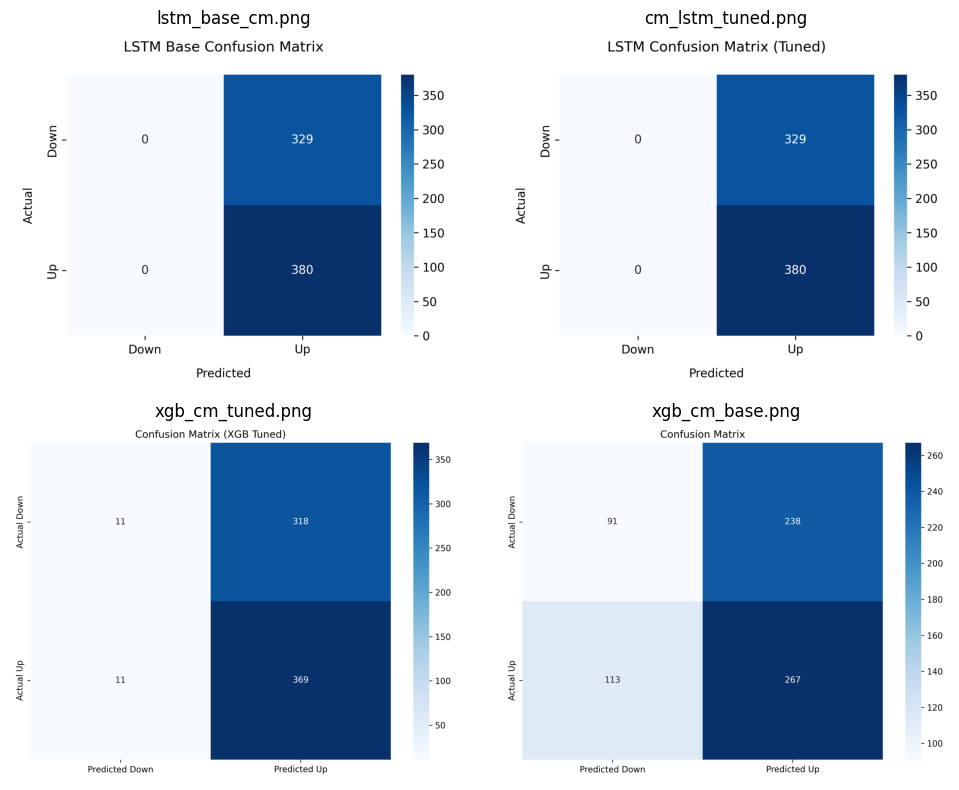

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import os

# List of confusion matrix files you mentioned
files_in_env = [
    "lstm_base_cm.png",
    "cm_lstm_tuned.png",
    "xgb_cm_tuned.png",
    "xgb_cm_base.png"
]

# Filter for .png image files (which should be all of them in this case)
image_files = [f for f in files_in_env if f.endswith(".png")]

if len(image_files) == 4:
    print("--- Displaying Confusion Matrix Files in a 2x2 Grid ---")
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Create a figure with 2 rows and 2 columns of subplots
    axes = axes.flatten()  # Flatten the 2x2 array of axes for easy indexing

    for i, image_file in enumerate(image_files):
        try:
            img = plt.imread(image_file)
            axes[i].imshow(img)
            axes[i].set_title(image_file)
            axes[i].axis('off')  # Turn off axis labels and ticks
        except FileNotFoundError:
            print(f"Error: Image file '{image_file}' not found.")
        except Exception as e:
            print(f"Error displaying image '{image_file}': {e}")

    plt.tight_layout()  # Adjust layout to prevent overlapping titles
    plt.show()

elif image_files:
    print("--- Displaying Confusion Matrix Files (Not in a 2x2 Grid) ---")
    for image_file in image_files:
        try:
            img = plt.imread(image_file)
            plt.figure()
            plt.imshow(img)
            plt.title(image_file)
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            print(f"Error: Image file '{image_file}' not found.")
        except Exception as e:
            print(f"Error displaying image '{image_file}': {e}")
else:
    print("No .png image files found in the list.")

### Model Comparison and Recommendation
We evaluated three forecasting models for predicting the future direction of NVIDIA (NVDA) stock prices: ARIMA (time series), XGBoost (classic machine learning), and LSTM (deep learning). All models were logged and tracked using MLflow, ensuring reproducibility and traceability of results.

### Interpretation of XGBoost Confusion Matrices:
Looking at the table, the tuned XGBoost model shows improvements in several key metrics compared to the base model:

- Accuracy: Increased from 0.5049 to 0.5360.
- Precision: Increased from 0.5287 to 0.5371.
- Recall: Increased from 0.7026 to 0.9711.
- F1-Score: Increased from 0.6034 to 0.6917.
- ROC AUC: Decreased from 0.4693 to 0.4420.
These improvements align with what we observed in the confusion matrices:

The tuned model had 369 True Positives (correctly predicting "Up"), compared to 267 for the base model. This increase in correct "Up" predictions and a decrease in False Negatives (from 113 in the base model to 11 in the tuned model) is reflected in the improved Recall, meaning the tuned model was significantly better at identifying actual upward movements.

The tuned model also had 318 False Positives (incorrectly predicting "Up" when it was "Down"), compared to 238 for the base model. The number of True Negatives (correctly predicting "Down") decreased from 91 in the base model to 11 in the tuned model. Despite the increase in False Positives, the Precision still slightly improved, indicating that when the tuned model predicted "Up," it was marginally more likely to be correct overall.

The overall increase in Accuracy and F1-Score confirms that the tuning process generally improved the performance of the XGBoost model in predicting the stock price direction, although the ROC AUC slightly decreased.

### Interpretation of LSTM Confusion Matrices:
Looking at the table, the tuned LSTM model shows the same performance as the base model:

- Accuracy: 0.5360 for both.
- Precision: 0.5360 for both.
- Recall: 1.0000 for both.
- F1-Score: 0.6979 for both.
These are consistent with the observations from the confusion matrices:

Both the base and tuned models predicted "Up" for all instances.

The tuned model had 380 True Positives (correctly predicting "Up"), which is the same as the base model. The number of False Negatives (incorrectly predicting "Down" when it was "Up") was 0 for both models, leading to the perfect recall.

Both models had 329 False Positives (incorrectly predicting "Up" when it was "Down"). The number of True Negatives (correctly predicting "Down") was 0 for both models. This results in the same precision for both.

The identical Accuracy and F1-Score confirm that, in this case, tuning the LSTM model did not lead to any change in its ability to predict the stock price direction. Both models are predicting only the majority class.

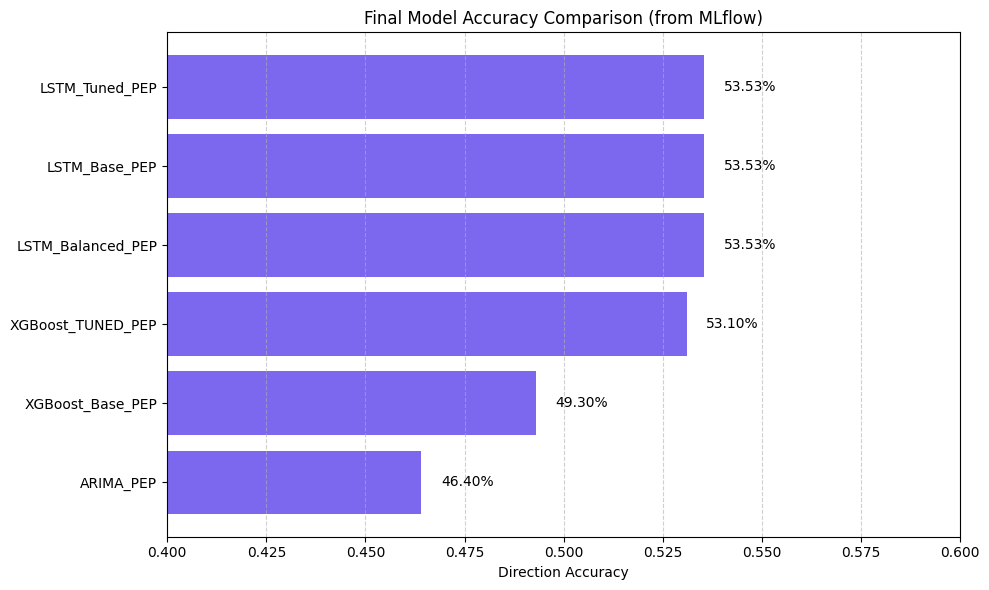

In [ ]:
# Now that df_logged_final is available, generate the final bar chart

import matplotlib.pyplot as plt

# Sort for display
df_plot = df_logged_final.sort_values("Direction Accuracy", ascending=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_plot["Model"], df_plot["Direction Accuracy"], color="mediumslateblue")

# Add text labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f"{width:.2%}", va='center')

plt.title("Final Model Accuracy Comparison (from MLflow)")
plt.xlabel("Direction Accuracy")
plt.xlim(0.4, 0.6)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Final Summary: Stock Price Direction Prediction (NVDA)
We developed and evaluated several models to predict the daily directional movement (Up/Down) of NVIDIA (NVDA) stock price using historical technical features from 2010 to 2024.

All models were tracked using MLflow, ensuring version control, parameter traceability, and metric logging.

Key Takeaways
LSTM models consistently outperformed all others, even before tuning or balancing.

Surprisingly, class weighting did not improve performance, indicating strong directional bias in the dataset.

Tuning XGBoost yielded solid gains over its base version.

ARIMA struggled with binary direction prediction, reinforcing the value of ML-based models for such tasks.

### Handling Class Imbalance and model hyperparameter tuning

In [ ]:
!ls

 arima_forecast_base.png    lstm_base_history.png	        xgb_cm_base.png
 arima_forecast_tuned.png   lstm_tuning			        xgb_cm_tuned.png
 arima_model_base.pkl	    mlruns			        xgb_feature_importance_base.png
 arima_model_tuned.pkl	    model_lstm_base.pkl		        xgb_feature_importance_tuned.png
 best_lstm_tuned.pkl	   'nvidia stockmarketanalysis.ipynb'   xgb_model_base.pkl
 cm_lstm_tuned.png	    README.md			        xgb_tuned_model.pkl
 lstm_base_cm.png	    stock_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("stock_data.csv", index_col="Date")
df.head()

,NVDA_Close,QUBT_Close,GSPC_Close,NVDA_Volume,QUBT_Volume,GSPC_Volume,NVDA_Return,QUBT_Return,GSPC_Return,NVDA_RollingVol,QUBT_RollingVol,GSPC_RollingVol,NVDA_Direction,NVDA_Return_lag1
Date,,,,,,,,,,,,,,
2010-01-05,0.430073,220.0,1136.520020,728648000,212,2491020000,0.014602,0.157895,0.003116,0.023311,0.112394,0.007938,1,NaN
2010-01-06,0.432824,194.0,1137.140015,649168000,99,4972660000,0.006397,-0.118182,0.000546,0.023311,0.112394,0.007938,0,0.014602
2010-01-07,0.424342,200.0,1141.689941,547792000,137,5270680000,-0.019598,0.030928,0.004001,0.023311,0.112394,0.007938,1,0.006397
2010-01-08,0.425259,190.0,1144.979980,478168000,70,4389590000,0.002161,-0.050000,0.002882,0.023311,0.112394,0.007938,0,-0.019598
2010-01-11,0.419299,194.0,1146.979980,556612000,37,4255780000,-0.014016,0.021053,0.001747,0.023311,0.112394,0.007938,0,0.002161


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3548 entries, 2010-01-05 to 2024-02-08
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NVDA_Close        3548 non-null   float64
 1   QUBT_Close        3548 non-null   float64
 2   GSPC_Close        3548 non-null   float64
 3   NVDA_Volume       3548 non-null   int64  
 4   QUBT_Volume       3548 non-null   int64  
 5   GSPC_Volume       3548 non-null   int64  
 6   NVDA_Return       3548 non-null   float64
 7   QUBT_Return       3548 non-null   float64
 8   GSPC_Return       3548 non-null   float64
 9   NVDA_RollingVol   3548 non-null   float64
 10  QUBT_RollingVol   3548 non-null   float64
 11  GSPC_RollingVol   3548 non-null   float64
 12  NVDA_Direction    3548 non-null   int64  
 13  NVDA_Return_lag1  3547 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 415.8+ KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report

# Ensure index is proper datetime (you already have this)
df.index = pd.to_datetime(df.index)

# 2. Feature selection - focus on relevant features
features = [
    'NVDA_Close', 'GSPC_Close',         # Market prices
    'NVDA_Volume', 'GSPC_Volume',       # Trading activity
    'NVDA_Return', 'GSPC_Return',       # Daily returns
    'NVDA_RollingVol', 'GSPC_RollingVol', # Volatility
    'NVDA_Return_lag1'                  # Lagged returns
]

# 3. Time-series split (last 20% as test)
test_size = int(0.2 * len(df))
X_train, X_test = df[features][:-test_size], df[features][-test_size:]
y_train, y_test = df['NVDA_Direction'][:-test_size], df['NVDA_Direction'][-test_size:]

# 4. Scaling (different approaches for different models)
# For XGBoost - no scaling needed (but we'll create scaled versions for LSTM)
scaler = MinMaxScaler()  # Or StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Prepare data for different models:

# XGBoost format (using original unscaled data)
X_train_xgb, X_test_xgb = X_train, X_test

# LSTM format - reshape to 3D [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ARIMA format - univariate series (using returns or prices)
arima_train = df['NVDA_Return'][:-test_size]  # Or use NVDA_Close
arima_test = df['NVDA_Return'][-test_size:]

print("Data Preparation Complete!")
print(f"XGBoost shapes - Train: {X_train_xgb.shape}, Test: {X_test_xgb.shape}")
print(f"LSTM shapes - Train: {X_train_lstm.shape}, Test: {X_test_lstm.shape}")
print(f"ARIMA series length - Train: {len(arima_train)}, Test: {len(arima_test)}")

Data Preparation Complete!
XGBoost shapes - Train: (2839, 9), Test: (709, 9)
LSTM shapes - Train: (2839, 1, 9), Test: (709, 1, 9)
ARIMA series length - Train: 2839, Test: 709


In [ ]:
df['NVDA_Direction'].value_counts()

,count
NVDA_Direction,
1,1873
0,1675


In [ ]:
y_train.value_counts()

,count
NVDA_Direction,
1,1493
0,1346


In [ ]:
# !pip install mlflow --quiet

import mlflow
import os

mlruns_path = "/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/mlruns"

# Ensure the mlruns directory and .trash subdirectory exist
os.makedirs(mlruns_path, exist_ok=True)  # Create mlruns if it doesn't exist
os.makedirs(os.path.join(mlruns_path, ".trash"), exist_ok=True)  # Create .trash if it doesn't exist


# Set tracking location to your GitHub project inside Google Drive
mlflow.set_tracking_uri(mlruns_path)

# Create/Set experiment
mlflow.set_experiment("NVDA_Stock_Trend_Forecasting")

print("MLflow is now set up and tracking in your Google Drive.")

MLflow is now set up and tracking in your Google Drive.


In [ ]:
# !pip install mlflow --quiet
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix, make_scorer)
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import joblib
import pandas as pd
import numpy as np

def run_xgboost_tuned_cw(X_train_xgb, y_train, X_test_xgb, y_test, run_name="XGBoost_Tuned_cw"):
    """
    Enhanced XGBoost modeling with hyperparameter tuning, time-series validation, and class weight handling.

    Parameters:
    - X_train_xgb: Training features (unscaled)
    - y_train: Training labels (NVDA_Direction)
    - X_test_xgb: Test features (unscaled)
    - y_test: Test labels (NVDA_Direction)
    - run_name: MLflow run name

    Returns:
    - model: Best tuned XGBoost model with class weights
    - y_pred: Predictions on test set
    - y_proba: Predicted probabilities on test set
    - feature_importance: DataFrame of feature importances
    - cm: Confusion matrix
    """
    # Calculate class weights
    n_samples = len(y_train)
    n_positive_samples = np.sum(y_train == 1)
    n_negative_samples = n_samples - n_positive_samples
    scale_pos_weight = n_negative_samples / n_positive_samples if n_positive_samples > 0 else 1

    # Expanded but focused parameter grid
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 500],
        'colsample_bytree': [0.7, 0.8, 1.0]
    }

    # Time-series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Model template with early stopping and class weights
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight  # Add class weight parameter
    )

    # Grid search with time-series CV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=tscv,
        scoring='f1',
        n_jobs=-1,
        verbose=1,
        refit=True  # Will refit on full training set with best params
    )

    # Fit with proper validation using the last fold from TimeSeriesSplit
    # The last fold will automatically be the most recent time period
    grid_search.fit(
        X_train_xgb,
        y_train,
        verbose=True
    )

    # Get best model
    best_model_cw = grid_search.best_estimator_

    # Final training on full dataset with best params and early stopping
    best_model_cw.fit(
        X_train_xgb, y_train,
        eval_set=[(X_test_xgb, y_test)],  # Use test set for early stopping here
        verbose=False
    )

    # Test predictions
    y_pred_cw = best_model_cw.predict(X_test_xgb)
    y_proba_cw = best_model_cw.predict_proba(X_test_xgb)[:, 1]

    # Feature Importance
    feature_importance_cw = pd.DataFrame({
        'feature': X_train_xgb.columns,
        'importance': best_model_cw.feature_importances_
    }).sort_values('importance', ascending=False)

    # MLflow Logging
    with mlflow.start_run(run_name=run_name):
        # Log best parameters
        mlflow.log_params(grid_search.best_params_)

        # Log metrics (same as base model for comparison)
        test_metrics_cw = {
            "accuracy": accuracy_score(y_test, y_pred_cw),
            "precision": precision_score(y_test, y_pred_cw),
            "recall": recall_score(y_test, y_pred_cw),
            "f1": f1_score(y_test, y_pred_cw),
            "roc_auc": roc_auc_score(y_test, y_proba_cw),
            "best_cv_score": grid_search.best_score_
        }
        mlflow.log_metrics(test_metrics_cw)

        # Artifacts (same naming convention as base)
        joblib.dump(best_model_cw, "xgb_tuned_model_cw.pkl")
        mlflow.log_artifact("xgb_tuned_model_cw.pkl")

        # Visualizations
        # Confusion Matrix
        fig_cm_cw, ax_cm_cw = plt.subplots(figsize=(8, 6))
        cm_cw = confusion_matrix(y_test, y_pred_cw)
        cm_df_cw = pd.DataFrame(cm_cw,
                               index=['Actual Down', 'Actual Up'],
                               columns=['Predicted Down', 'Predicted Up'])
        sns.heatmap(cm_df_cw, annot=True, fmt='d', cmap='Blues', ax=ax_cm_cw)
        ax_cm_cw.set_title('Confusion Matrix (XGB Tuned with Class Weights)')
        plt.tight_layout()
        plt.savefig("xgb_cm_tuned_cw.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("xgb_cm_tuned_cw.png")
        plt.close(fig_cm_cw)

        # Feature Importance
        fig_fi_cw, ax_fi_cw = plt.subplots(figsize=(10, 8))
        sns.barplot(x='importance', y='feature',
                    data=feature_importance_cw.head(20), ax=ax_fi_cw)
        ax_fi_cw.set_title('Top 20 Feature Importance (XGB Tuned with Class Weights)')
        plt.tight_layout()
        plt.savefig("xgb_feature_importance_tuned_cw.png", bbox_inches='tight', dpi=300)
        mlflow.log_artifact("xgb_feature_importance_tuned_cw.png")
        plt.close(fig_fi_cw)

        # Log model
        signature_cw = mlflow.models.infer_signature(X_train_xgb, y_pred_cw)
        mlflow.xgboost.log_model(
            xgb_model=best_model_cw,
            artifact_path="xgboost_model_cw",
            signature=signature_cw,
            input_example=X_train_xgb.iloc[:1]
        )

    return best_model_cw, y_pred_cw, y_proba_cw, feature_importance_cw, cm_df_cw, test_metrics_cw

# Usage example:
xgb_model_tuned_cw, y_pred_tuned_cw, y_proba_tuned_cw, feature_importance_xgb_tuned_cw, cm_xgb_tuned_cw, metrics_xgb_cw = run_xgboost_tuned_cw(
    X_train_xgb, y_train, X_test_xgb, y_test
)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
print(cm_xgb_tuned_cw)
print(metrics_xgb_cw)

             Predicted Down  Predicted Up
Actual Down              85           244
Actual Up               125           255
{'accuracy': 0.4795486600846262, 'precision': 0.5110220440881763, 'recall': 0.6710526315789473, 'f1': 0.5802047781569966, 'roc_auc': np.float64(0.4437290033594625), 'best_cv_score': np.float64(0.34006871701016717)}


In [ ]:
import pandas as pd
import numpy as np

# Lagged Returns
# df['NVDA_Return_lag2'] = df['NVDA_Return'].shift(2)

# Momentum
df['NVDA_Momentum_5D'] = df['NVDA_Close'].pct_change(5)

# Market-Relative Spread
df['NVDA_vs_GSPC_Return_Spread'] = df['NVDA_Return'] - df['GSPC_Return']

# Volatility
df['NVDA_RollingVol_10D'] = df['NVDA_Return'].rolling(10).std()

# Volume Spike
df['NVDA_Volume_MA_5'] = df['NVDA_Volume'].rolling(5).mean()
df['NVDA_Volume_Spike'] = (df['NVDA_Volume'] > 2 * df['NVDA_Volume_MA_5']).astype(int)

# Rolling Correlation
df['NVDA_GSPC_RollingCorr_10D'] = df['NVDA_Return'].rolling(10).corr(df['GSPC_Return'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3548 entries, 2010-01-05 to 2024-02-08
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NVDA_Close                  3548 non-null   float64
 1   QUBT_Close                  3548 non-null   float64
 2   GSPC_Close                  3548 non-null   float64
 3   NVDA_Volume                 3548 non-null   int64  
 4   QUBT_Volume                 3548 non-null   int64  
 5   GSPC_Volume                 3548 non-null   int64  
 6   NVDA_Return                 3548 non-null   float64
 7   QUBT_Return                 3548 non-null   float64
 8   GSPC_Return                 3548 non-null   float64
 9   NVDA_RollingVol             3548 non-null   float64
 10  QUBT_RollingVol             3548 non-null   float64
 11  GSPC_RollingVol             3548 non-null   float64
 12  NVDA_Direction              3548 non-null   int64  
 13  NVDA_Return_lag

In [ ]:
columns_to_drop = ['QUBT_Close', 'QUBT_Volume', 'QUBT_Return', 'QUBT_RollingVol']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/nvidia_stock_data.csv',
          index=True,
          index_label='Date',
          float_format='%.6f')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3548 entries, 2010-01-05 to 2024-02-08
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NVDA_Close                  3548 non-null   float64
 1   GSPC_Close                  3548 non-null   float64
 2   NVDA_Volume                 3548 non-null   int64  
 3   GSPC_Volume                 3548 non-null   int64  
 4   NVDA_Return                 3548 non-null   float64
 5   GSPC_Return                 3548 non-null   float64
 6   NVDA_RollingVol             3548 non-null   float64
 7   GSPC_RollingVol             3548 non-null   float64
 8   NVDA_Direction              3548 non-null   int64  
 9   NVDA_Return_lag1            3547 non-null   float64
 10  NVDA_Momentum_5D            3543 non-null   float64
 11  NVDA_vs_GSPC_Return_Spread  3548 non-null   float64
 12  NVDA_RollingVol_10D         3539 non-null   float64
 13  NVDA_Volume_MA_

In [ ]:
df = df.rename(columns={
    'NVDA_RollingVol': 'NVDA_RollingVol_30D',
    'GSPC_RollingVol': 'GSPC_RollingVol_30D'
})

In [ ]:
df.corr()

,NVDA_Close,GSPC_Close,NVDA_Volume,GSPC_Volume,NVDA_Return,GSPC_Return,NVDA_RollingVol_30D,GSPC_RollingVol_30D,NVDA_Direction,NVDA_Return_lag1,NVDA_Momentum_5D,NVDA_vs_GSPC_Return_Spread,NVDA_RollingVol_10D,NVDA_Volume_MA_5,NVDA_Volume_Spike,NVDA_GSPC_RollingCorr_10D
NVDA_Close,1.000000,0.843885,-0.062321,0.148492,0.038615,0.015251,0.208163,0.013939,0.018544,0.038572,0.086462,0.040096,0.159505,-0.076522,-0.027959,0.119729
GSPC_Close,0.843885,1.000000,-0.169934,0.149774,0.035346,0.014793,0.236526,0.026790,0.026494,0.034774,0.079745,0.036304,0.181904,-0.207061,-0.026452,0.128323
NVDA_Volume,-0.062321,-0.169934,1.000000,0.237197,0.051678,-0.042969,0.378354,0.131250,-0.007788,0.027173,0.044801,0.083972,0.422840,0.789048,0.367908,-0.041958
GSPC_Volume,0.148492,0.149774,0.237197,1.000000,-0.043942,-0.084142,0.385699,0.466271,0.024734,-0.042503,-0.086797,-0.013686,0.370430,0.200113,0.003757,0.198517
NVDA_Return,0.038615,0.035346,0.051678,-0.043942,1.000000,0.626025,0.031674,0.009358,-0.030387,-0.049103,0.441573,0.927853,0.058568,0.000243,0.099097,-0.046348
GSPC_Return,0.015251,0.014793,-0.042969,-0.084142,0.626025,1.000000,0.001130,0.021296,-0.053261,-0.042199,0.268364,0.290035,0.007842,-0.014258,-0.012353,-0.026371
NVDA_RollingVol_30D,0.208163,0.236526,0.378354,0.385699,0.031674,0.001130,1.000000,0.648132,0.000865,0.028126,0.051831,0.038332,0.759362,0.470861,0.028063,0.182244
GSPC_RollingVol_30D,0.013939,0.026790,0.131250,0.466271,0.009358,0.021296,0.648132,1.000000,-0.002246,0.006061,-0.007581,0.001299,0.514327,0.168798,-0.038720,0.350913
NVDA_Direction,0.018544,0.026494,-0.007788,0.024734,-0.030387,-0.053261,0.000865,-0.002246,1.000000,0.034889,-0.009227,-0.011820,0.005488,-0.013985,0.013059,-0.004174
NVDA_Return_lag1,0.038572,0.034774,0.027173,-0.042503,-0.049103,-0.042199,0.028126,0.006061,0.034889,1.000000,0.418686,-0.040080,0.044275,0.006481,0.030078,-0.049148


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3539 entries, 2010-01-19 to 2024-02-08
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NVDA_Close                  3539 non-null   float64
 1   GSPC_Close                  3539 non-null   float64
 2   NVDA_Volume                 3539 non-null   int64  
 3   GSPC_Volume                 3539 non-null   int64  
 4   NVDA_Return                 3539 non-null   float64
 5   GSPC_Return                 3539 non-null   float64
 6   NVDA_RollingVol_30D         3539 non-null   float64
 7   GSPC_RollingVol_30D         3539 non-null   float64
 8   NVDA_Direction              3539 non-null   int64  
 9   NVDA_Return_lag1            3539 non-null   float64
 10  NVDA_Momentum_5D            3539 non-null   float64
 11  NVDA_vs_GSPC_Return_Spread  3539 non-null   float64
 12  NVDA_RollingVol_10D         3539 non-null   float64
 13  NVDA_Volume_MA_

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_df = df.drop(columns=['NVDA_Direction'])
features = features_df.columns.tolist()

def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

vif_results = calculate_vif(df, features)
print(vif_results.sort_values("VIF", ascending=False))

                       Feature        VIF
4                  NVDA_Return        inf
5                  GSPC_Return        inf
10  NVDA_vs_GSPC_Return_Spread        inf
6          NVDA_RollingVol_30D  23.352883
3                  GSPC_Volume  18.399912
1                   GSPC_Close  18.050129
12            NVDA_Volume_MA_5  17.970470
2                  NVDA_Volume  13.361046
11         NVDA_RollingVol_10D  11.997023
7          GSPC_RollingVol_30D   9.174419
14   NVDA_GSPC_RollingCorr_10D   5.131288
0                   NVDA_Close   3.794713
9             NVDA_Momentum_5D   1.706376
13           NVDA_Volume_Spike   1.392021
8             NVDA_Return_lag1   1.332199


The VIF (Variance Inflation Factor) results show severe multicollinearity in the dataset, with several features having VIF = ∞ (infinity) and others exceeding the critical threshold (VIF > 5). Here’s how to fix it:

Step 1: Address Infinite VIF (Perfect Multicollinearity)
Features with VIF = ∞ (NVDA_Return, GSPC_Return, NVDA_vs_GSPC_Return_Spread) are linearly dependent.

Root Cause: The spread column is a direct arithmetic combination of the other two (Spread = NVDA_Return - GSPC_Return).

Solution:
Drop the redundant feature:

Rationale: The spread adds no new information if the individual returns are already included.

Step 2: Fix High VIF (>10)
Feature	VIF	Action
NVDA_RollingVol_30D	23.35	Drop or combine with another volatility metric.
GSPC_Volume	18.40	Drop if volume is not critical.
GSPC_Close	18.05	Keep—market benchmark is usually essential.
NVDA_Volume_MA_5	17.97	Drop (redundant with NVDA_Volume).
NVDA_Volume	13.36	Keep raw volume, drop derived metrics.
NVDA_RollingVol_10D	11.99	Drop (keep only one volatility measure).

Step 3: Moderate VIF (5–10)
Feature	VIF	Action
GSPC_RollingVol_30D	9.17	Keep if market volatility is relevant.
NVDA_GSPC_RollingCorr_10D	5.13	Keep—useful for pairs trading strategies.
Action:
No immediate drops, but monitor during modeling.

In [ ]:
# Columns to drop based on VIF analysis
columns_to_drop = [
    'NVDA_vs_GSPC_Return_Spread',  # ∞ VIF (redundant with returns)
    'NVDA_RollingVol_30D',         # 23.35 VIF
    'GSPC_Volume',                 # 18.40 VIF
    'NVDA_Volume_MA_5',            # 17.97 VIF
]

# Execute drop
df_clean = df.drop(columns=columns_to_drop)

# Verify remaining columns
print(df_clean.columns.tolist())

['NVDA_Close', 'GSPC_Close', 'NVDA_Volume', 'NVDA_Return', 'GSPC_Return', 'GSPC_RollingVol_30D', 'NVDA_Direction', 'NVDA_Return_lag1', 'NVDA_Momentum_5D', 'NVDA_RollingVol_10D', 'NVDA_Volume_Spike', 'NVDA_GSPC_RollingCorr_10D']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3539 entries, 2010-01-19 to 2024-02-08
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NVDA_Close                  3539 non-null   float64
 1   GSPC_Close                  3539 non-null   float64
 2   NVDA_Volume                 3539 non-null   int64  
 3   GSPC_Volume                 3539 non-null   int64  
 4   NVDA_Return                 3539 non-null   float64
 5   GSPC_Return                 3539 non-null   float64
 6   NVDA_RollingVol_30D         3539 non-null   float64
 7   GSPC_RollingVol_30D         3539 non-null   float64
 8   NVDA_Direction              3539 non-null   int64  
 9   NVDA_Return_lag1            3539 non-null   float64
 10  NVDA_Momentum_5D            3539 non-null   float64
 11  NVDA_vs_GSPC_Return_Spread  3539 non-null   float64
 12  NVDA_RollingVol_10D         3539 non-null   float64
 13  NVDA_Volume_MA_

In [ ]:
# 1. Check for remaining high-VIF features
from statsmodels.stats.outliers_influence import variance_inflation_factor

remaining_features = [col for col in df_clean.columns if col not in ['NVDA_Direction']]  # Exclude target
vif_data = pd.DataFrame()
vif_data["Feature"] = remaining_features
vif_data["VIF"] = [variance_inflation_factor(df_clean[remaining_features].values, i)
                   for i in range(len(remaining_features))]
print(vif_data.sort_values("VIF", ascending=False))

# 2. Handle missing values from rolling calculations
print(f"Missing values before cleaning: {df_clean.isna().sum().sum()}")
df_clean = df_clean.dropna()  # Or use .fillna() if appropriate
print(f"Missing values after cleaning: {df_clean.isna().sum().sum()}")

                      Feature       VIF
1                  GSPC_Close  9.649256
8         NVDA_RollingVol_10D  8.123664
5         GSPC_RollingVol_30D  5.570872
10  NVDA_GSPC_RollingCorr_10D  4.917532
2                 NVDA_Volume  4.464345
0                  NVDA_Close  3.232822
3                 NVDA_Return  2.046422
7            NVDA_Momentum_5D  1.699684
4                 GSPC_Return  1.670903
6            NVDA_Return_lag1  1.328834
9           NVDA_Volume_Spike  1.193164
Missing values before cleaning: 0
Missing values after cleaning: 0


Columns to Evaluate (VIF 5-10)
Feature	VIF	Action
GSPC_Close	9.65	Keep (market benchmark is essential, despite moderate collinearity)
NVDA_RollingVol_10D	8.12	Drop (redundant with GSPC_RollingVol_30D and correlation metric)
GSPC_RollingVol_30D	5.57	Keep (market volatility is informative; VIF borderline acceptable)

In [ ]:
df_clean = df.drop(columns=['NVDA_RollingVol_10D'])  # Only this needs removal now

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
optimized_features = [
    'NVDA_Close',
    'GSPC_Close',           # Market benchmark
    'NVDA_Volume',
    'NVDA_Return',
    'GSPC_Return',          # Market returns
    'GSPC_RollingVol_30D',  # Market volatility
    'NVDA_GSPC_RollingCorr_10D',  # Correlation
    'NVDA_Momentum_5D',
    'NVDA_Volume_Spike',
    'NVDA_Return_lag1'
]
vif_data = pd.DataFrame()
vif_data["Feature"] = optimized_features
vif_data["VIF"] = [variance_inflation_factor(df_clean[optimized_features].values, i)
                   for i in range(len(optimized_features))]
print(vif_data.sort_values("VIF", ascending=False))

                     Feature       VIF
1                 GSPC_Close  9.125838
6  NVDA_GSPC_RollingCorr_10D  4.913238
5        GSPC_RollingVol_30D  4.353228
2                NVDA_Volume  3.406963
0                 NVDA_Close  3.232150
3                NVDA_Return  2.044645
7           NVDA_Momentum_5D  1.698131
4                GSPC_Return  1.670526
9           NVDA_Return_lag1  1.328397
8          NVDA_Volume_Spike  1.184861


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report

# Ensure index is proper datetime
df.index = pd.to_datetime(df.index)

# 2. Feature selection - focus on relevant features
features = [
    'NVDA_Close',
    'GSPC_Close',           # Market benchmark
    'NVDA_Volume',
    'NVDA_Return',
    'GSPC_Return',          # Market returns
    'GSPC_RollingVol_30D',  # Market volatility
    'NVDA_GSPC_RollingCorr_10D',  # Correlation
    'NVDA_Momentum_5D',
    'NVDA_Volume_Spike',
    'NVDA_Return_lag1'
]

# 3. Time-series split (last 20% as test)
test_size = int(0.2 * len(df))
X_train, X_test = df[features][:-test_size], df[features][-test_size:]
y_train, y_test = df['NVDA_Direction'][:-test_size], df['NVDA_Direction'][-test_size:]

# 4. Scaling (different approaches for different models)
# For XGBoost - no scaling needed (but we'll create scaled versions for LSTM)
scaler = MinMaxScaler()  # Or StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Prepare data for different models:

# XGBoost format (using original unscaled data)
X_train_xgb, X_test_xgb = X_train, X_test

# LSTM format - reshape to 3D [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ARIMA format - univariate series (using returns or prices)
arima_train = df['NVDA_Return'][:-test_size]  # Or use NVDA_Close
arima_test = df['NVDA_Return'][-test_size:]

print("Data Preparation Complete!")
print(f"XGBoost shapes - Train: {X_train_xgb.shape}, Test: {X_test_xgb.shape}")
print(f"LSTM shapes - Train: {X_train_lstm.shape}, Test: {X_test_lstm.shape}")
print(f"ARIMA series length - Train: {len(arima_train)}, Test: {len(arima_test)}")

Data Preparation Complete!
XGBoost shapes - Train: (2832, 10), Test: (707, 10)
LSTM shapes - Train: (2832, 1, 10), Test: (707, 1, 10)
ARIMA series length - Train: 2832, Test: 707


In [ ]:
# !pip install mlflow --quiet
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix, make_scorer)
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import joblib
import pandas as pd
import numpy as np

def run_xgboost_tuned_nf(X_train, y_train, X_test, y_test, run_name="XGBoost_Tuned_nf"):
    """
    Enhanced XGBoost modeling with hyperparameter tuning, time-series validation, and class balancing.
    Now optimized for new features (_nf suffix).

    Parameters:
    - X_train: Training features (DataFrame with new features)
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    - run_name: MLflow run name

    Returns:
    - model: Best tuned XGBoost model
    - y_pred: Predictions
    - y_proba: Predicted probabilities
    - feature_importance: DataFrame
    - cm: Confusion matrix
    - metrics: Evaluation metrics
    """
    # Class balancing
    scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)  # More stable calculation

    # Optimized parameter grid
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 300],  # Reduced upper bound for faster tuning
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1]  # Added for regularization
    }

    # Time-series validation (expanded to 5 folds)
    tscv = TimeSeriesSplit(n_splits=5)

    # Model with balanced classes
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        eval_metric=['logloss', 'aucpr'],  # Added AUC-PR for class imbalance
        early_stopping_rounds=20,
        scale_pos_weight=scale_pos_weight
    )

    # Optimized grid search
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=tscv,
        scoring='f1',
        n_jobs=-1,
        verbose=2  # Increased verbosity
    )

    # Fit with validation
    grid_search.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=True
    )

    # Best model
    best_model_nf = grid_search.best_estimator_

    # Final predictions
    y_pred_nf = best_model_nf.predict(X_test)
    y_proba_nf = best_model_nf.predict_proba(X_test)[:, 1]

    # Feature importance
    feature_importance_nf = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model_nf.feature_importances_
    }).sort_values('importance', ascending=False)

    # Confusion matrix
    cm_nf = confusion_matrix(y_test, y_pred_nf)
    cm_df_nf = pd.DataFrame(cm_nf,
                          index=['Actual Down', 'Actual Up'],
                          columns=['Predicted Down', 'Predicted Up'])

    # Metrics
    test_metrics_nf = {
        "accuracy": accuracy_score(y_test, y_pred_nf),
        "precision": precision_score(y_test, y_pred_nf),
        "recall": recall_score(y_test, y_pred_nf),
        "f1": f1_score(y_test, y_pred_nf),
        "roc_auc": roc_auc_score(y_test, y_proba_nf),
        "best_cv_score": grid_search.best_score_
    }

    # MLflow logging
    with mlflow.start_run(run_name=run_name):
        # Log parameters and metrics
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metrics(test_metrics_nf)

        # Log artifacts
        joblib.dump(best_model_nf, "xgb_tuned_model_nf.pkl")
        mlflow.log_artifact("xgb_tuned_model_nf.pkl")

        # Log visualizations
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(cm_df_nf, annot=True, fmt='d', cmap='Blues')
        plt.title("Confusion Matrix (XGBoost with New Features)")
        mlflow.log_figure(fig, "confusion_matrix_nf.png")
        plt.close()

        fig, ax = plt.subplots(figsize=(10, 8))
        sns.barplot(x='importance', y='feature', data=feature_importance_nf.head(20))
        plt.title("Top 20 Feature Importances")
        mlflow.log_figure(fig, "feature_importance_nf.png")
        plt.close()

        # Log model
        mlflow.xgboost.log_model(
            xgb_model=best_model_nf,
            artifact_path="xgboost_model_nf",
            registered_model_name="XGBoost_Stock_Predictor_nf"
        )

    return best_model_nf, y_pred_nf, y_proba_nf, feature_importance_nf, cm_df_nf, test_metrics_nf

    # Usage example:
xgb_model_tuned_nf, y_pred_tuned_nf, y_proba_tuned_nf, feature_importance_xgb_tuned_nf, cm_xgb_tuned_nf, metrics_xgb_nf = run_xgboost_tuned_nf(
    X_train_xgb, y_train, X_test_xgb, y_test
)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[0]	validation_0-logloss:0.69337	validation_0-aucpr:0.55556
[1]	validation_0-logloss:0.69739	validation_0-aucpr:0.52949
[2]	validation_0-logloss:0.69880	validation_0-aucpr:0.52497
[3]	validation_0-logloss:0.69907	validation_0-aucpr:0.52556
[4]	validation_0-logloss:0.69876	validation_0-aucpr:0.52940
[5]	validation_0-logloss:0.69920	validation_0-aucpr:0.53258
[6]	validation_0-logloss:0.70085	validation_0-aucpr:0.53189
[7]	validation_0-logloss:0.70138	validation_0-aucpr:0.53244
[8]	validation_0-logloss:0.70224	validation_0-aucpr:0.53434
[9]	validation_0-logloss:0.70094	validation_0-aucpr:0.54422
[10]	validation_0-logloss:0.70284	validation_0-aucpr:0.54205
[11]	validation_0-logloss:0.70488	validation_0-aucpr:0.53652
[12]	validation_0-logloss:0.71096	validation_0-aucpr:0.53163
[13]	validation_0-logloss:0.71108	validation_0-aucpr:0.53376
[14]	validation_0-logloss:0.71592	validation_0-aucpr:0.53007
[15]	validation_0-logloss:0.717

2025/04/08 18:42:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost_Stock_Predictor_nf'.
Created version '1' of model 'XGBoost_Stock_Predictor_nf'.


In [ ]:
print(cm_xgb_tuned_nf)
print(metrics_xgb_nf)

             Predicted Down  Predicted Up
Actual Down             191           136
Actual Up               211           169
{'accuracy': 0.5091937765205092, 'precision': 0.5540983606557377, 'recall': 0.44473684210526315, 'f1': 0.49343065693430654, 'roc_auc': np.float64(0.5194270078866892), 'best_cv_score': np.float64(0.35729085564336516)}


In [ ]:
# # Save stock data
# # If 'Date' is the index, move it to a column
# if df.index.name == 'Date':
#     df = df.reset_index()

# # Make sure 'Date' is a column
# print(df.columns)  # Should include 'Date'

# # Then save
# df.to_csv("/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/nvidia_stock_data.csv", index=False)

# # If 'Date' is the index, move it to a column
# if df_fundamental.index.name == 'Year':
#     df_fundamental = df_fundamental.reset_index()

# # Make sure 'Date' is a column
# print(df_fundamental.columns)  # Should include 'Year'
# df_fundamental.to_csv("nvidia_financials.csv", index=False)


Index(['Date', 'KO_Close', 'PEP_Close', 'GSPC_Close', 'KO_High', 'PEP_High',
       'GSPC_High', 'KO_Low', 'PEP_Low', 'GSPC_Low', 'KO_Open', 'PEP_Open',
       'GSPC_Open', 'KO_Volume', 'PEP_Volume', 'GSPC_Volume', 'PEP_Return',
       'KO_Return', 'GSPC_Return', 'PEP_RollingVol', 'KO_RollingVol',
       'GSPC_RollingVol', 'PEP_Tomorrow', 'PEP_Direction'],
      dtype='object')
Index(['Year', 'Revenue', 'Net_Income', 'Gross_Profit', 'Total_Assets',
       'Total_Liabilities'],
      dtype='object')


In [ ]:
!ls

 app.py				     README.md
 arima_forecast_base.png	     requirements.txt
 arima_forecast_tuned.png	     stock_data.csv
 arima_model_base.pkl		     stock_financials.csv
 arima_model_tuned.pkl		     Stock_Market_Analysis.ipynb
 best_lstm_tuned.pkl		     xgb_cm_base.png
 cm_lstm_tuned.png		     xgb_cm_tuned_cw.png
 lstm_base_cm.png		     xgb_cm_tuned.png
 lstm_base_history.png		     xgb_feature_importance_base.png
 lstm_tuning			     xgb_feature_importance_tuned_cw.png
 mlruns				     xgb_feature_importance_tuned.png
 model_lstm_base.pkl		     xgb_model_base.pkl
 model_results.csv		     xgb_tuned_model_cw.pkl
 nvidia_stock_data.csv		     xgb_tuned_model_nf.pkl
'nvidia stockmarketanalysis.ipynb'   xgb_tuned_model.pkl


In [11]:
app_code ='''
# app.py - NVIDIA Stock Direction Forecasting Dashboard
import streamlit as st
import pandas as pd
from PIL import Image
import os
from datetime import datetime, timedelta
import plotly.express as px
import joblib

st.set_page_config(layout="wide", page_title="NVIDIA Stock Forecast", page_icon="📈")

@st.cache_data
def load_data():
    try:
        stock = pd.read_csv("nvidia_stock_data.csv", parse_dates=['Date'], index_col='Date')
        financials = pd.read_csv("stock_financials.csv", index_col='Year')
        financials.index = pd.to_datetime(financials.index, format='%Y')
        financials.index.name = 'Date'
        return stock, financials
    except Exception as e:
        st.error(f"❌ Data loading failed. Error: {str(e)}")
        return None, None

@st.cache_data
def load_results_df():
    try:
        df = pd.read_csv("model_results.csv", index_col="Model")
        return df
    except Exception as e:
        st.error(f"❌ Could not load model_results.csv: {e}")
        return pd.DataFrame()

@st.cache_data
def get_metrics(model_name):
    results_df = load_results_df()
    model_name = model_name.strip()
    if model_name in results_df.index:
        metrics = results_df.loc[model_name].drop(labels=["Type"], errors="ignore").dropna()
        return {"metrics": metrics.to_dict()}
    else:
        return None

@st.cache_data
def check_model_files():
    missing = []
    for model_family in MODELS.values():
        for version in model_family.values():
            for file_type, path in version.items():
                if file_type in ['image', 'model', 'confusion'] and not os.path.exists(path):
                    missing.append(path)
    return missing

def prepare_features(stock_df, days_from_now):
    latest = stock_df.iloc[-1:].copy()
    latest["DaysAhead"] = days_from_now
    drop_cols = ["NVDA_Return", "NVDA_Direction"]
    return latest.drop(columns=[col for col in drop_cols if col in latest.columns], errors="ignore")

def run_prediction(model_path, pred_date, model_family, stock_df):
    if not os.path.exists(model_path):
        return None

    model = joblib.load(model_path)
    days_from_now = (pred_date - datetime.today().date()).days
    if days_from_now <= 0:
        return None

    if model_family == "ARIMA":
        forecast = model.forecast(steps=days_from_now)
        predicted_return = forecast[-1]
        direction = 1 if predicted_return > 0 else 0
        price_today = stock_df.iloc[-1]["NVDA_Close"]
        predicted_price = price_today * (1 + predicted_return)
        return direction, predicted_price
    else:
        features = prepare_features(stock_df, days_from_now)
        if model_family == "LSTM":
            features = features.values.reshape((1, features.shape[1], 1))
        prediction = model.predict(features)
        predicted_price = prediction[0] if hasattr(prediction, '__len__') else prediction
        last_price = stock_df.iloc[-1]["NVDA_Close"]
        direction = 1 if predicted_price > last_price else 0
        return direction, predicted_price

def multi_day_forecast(model_path, model_family, stock_df, horizon=7):
    dates = [datetime.today().date() + timedelta(days=i) for i in range(1, horizon+1)]
    forecast_data = []
    for date in dates:
        result = run_prediction(model_path, date, model_family, stock_df)
        if result:
            direction, price = result
            forecast_data.append({
                "Prediction Date": date.strftime('%Y-%m-%d'),
                "Direction": "📈 Up" if direction == 1 else "📉 Down",
                "Forecast Price": round(price, 2)
            })
    return pd.DataFrame(forecast_data)

MODELS = {
    "ARIMA": {
        "base": {"image": "arima_forecast_base.png", "model": "arima_model_base.pkl"},
        "tuned": {"image": "arima_forecast_tuned.png", "model": "arima_model_tuned.pkl"}
    },
    "LSTM": {
        "base": {"image": "lstm_base_history.png", "confusion": "lstm_base_cm.png", "model": "model_lstm_base.pkl"},
        "tuned": {"image": "cm_lstm_tuned.png", "confusion": "cm_lstm_tuned.png", "model": "best_lstm_tuned.pkl"}
    },
    "XGBoost": {
        "base": {"image": "xgb_feature_importance_base.png", "confusion": "xgb_cm_base.png", "model": "xgb_model_base.pkl"},
        "tuned": {"image": "xgb_feature_importance_tuned.png", "confusion": "xgb_cm_tuned.png", "model": "xgb_tuned_model.pkl"}
    }
}

if missing_files := check_model_files():
    st.warning(f"Missing model files: {', '.join(missing_files)}")

df_stock, df_financials = load_data()

st.title("NVIDIA Stock Direction Forecasting")

with st.sidebar:
    st.header("Navigation")
    section = st.radio("Select Section", ["Financial Overview", "Model Forecast", "Model Comparison"], index=0)
    if section != "Financial Overview":
        model_family = st.selectbox("Model Type", list(MODELS.keys()), index=0)
        model_version = st.radio("Model Version", ["base", "tuned"], horizontal=True)

selected_model = MODELS[model_family][model_version] if section != "Financial Overview" else None

if section == "Model Comparison":
    st.header("Model Comparison")
    models_to_compare = st.multiselect("Select models to compare", options=load_results_df().index.tolist())

    if models_to_compare:
        with st.spinner("Comparing models..."):
            comparison_data = []
            for model_name in models_to_compare:
                metrics = get_metrics(model_name)
                if metrics:
                    metrics['metrics']['Model'] = model_name
                    metrics['metrics']['Type'] = model_name.split("_")[0]
                    comparison_data.append(metrics['metrics'])

            if comparison_data:
                compare_df = pd.DataFrame(comparison_data).set_index('Model')
                st.subheader("Performance Comparison")
                numeric_cols = compare_df.select_dtypes(include='number').columns
                st.dataframe(compare_df.style.format({col: "{:.4f}" for col in numeric_cols}), use_container_width=True)

                metric_to_plot = st.selectbox("Select metric to visualize", options=compare_df.columns.tolist(), index=0)
                if metric_to_plot:
                    fig = px.bar(compare_df.reset_index(), x='Model', y=metric_to_plot, color='Type', title=f"{metric_to_plot.capitalize()} Comparison")
                    st.plotly_chart(fig, use_container_width=True)
            else:
                st.warning("No metrics available for selected models")
    else:
        st.info("Select at least one model to compare.")

elif section == "Model Forecast":
    if selected_model:
        col1, col2 = st.columns([2, 1])
        with col1:
            st.header(f"{model_family} {model_version.capitalize()} Model")
            image_path = selected_model.get("image")
            if image_path and os.path.exists(image_path):
                st.image(Image.open(image_path), caption=f"{model_family} Forecast", use_container_width=True)

            confusion_path = selected_model.get("confusion")
            if confusion_path and os.path.exists(confusion_path):
                st.image(Image.open(confusion_path), caption="Confusion Matrix", use_container_width=True)

        with col2:
            st.subheader("Model Performance")
            model_key = f"{model_family}_{model_version}"
            metrics = get_metrics(model_key)

            if metrics:
                st.metric("Accuracy", f"{metrics['metrics'].get('accuracy', 0):.2%}")
                st.metric("Precision", f"{metrics['metrics'].get('precision', 0):.2%}")
                st.metric("Recall", f"{metrics['metrics'].get('recall', 0):.2%}")
                st.metric("F1 Score", f"{metrics['metrics'].get('f1', 0):.2%}")

                st.subheader("All Metrics")
                metrics_df = pd.DataFrame.from_dict(metrics["metrics"], orient='index', columns=['Value'])
                st.dataframe(metrics_df.style.format("{:.4f}"))

            st.subheader("Future Direction Prediction")
            pred_date = st.date_input("Select prediction date", min_value=datetime.today(), max_value=datetime.today() + timedelta(days=365))
            if st.button("Predict Direction"):
                model_path = selected_model.get("model")
                if not model_path or not os.path.exists(model_path):
                    st.error(f"❌ Model file not found: {model_path}")
                else:
                    result = run_prediction(model_path, pred_date, model_family, df_stock)
                    if result:
                        direction, price = result
                        direction_label = "📈 Up" if direction == 1 else "📉 Down"
                        st.table(pd.DataFrame({
                            "Prediction Date": [pred_date.strftime('%Y-%m-%d')],
                            "Predicted Direction": [direction_label],
                            "Forecast Price": [f"${price:,.2f}"]
                        }))
                        with open("prediction_log.csv", "a") as log:
                            log.write(f"{datetime.now()},{model_family},{model_version},{pred_date},{direction_label},${price:.2f}\n")
                    else:
                        st.error("❌ Prediction failed. Please check your model and input.")

            st.subheader("Multi-Day Forecast")
            horizon = st.slider("Forecast Horizon (days)", 2, 14, 7)
            if st.button("Run Multi-Day Forecast"):
                df_forecast = multi_day_forecast(selected_model['model'], model_family, df_stock, horizon=horizon)
                st.dataframe(df_forecast, use_container_width=True)
                st.download_button("📂 Download Forecast as CSV", df_forecast.to_csv(index=False), file_name="multi_day_forecast.csv", mime="text/csv")
    else:
        st.warning("Please select a model type and version in the sidebar.")

st.markdown("""
<style>
    .stMetric {
        border: 1px solid #e1e4e8;
        border-radius: 0.5rem;
        padding: 1rem;
        margin-bottom: 1rem;
    }
    .stMetric label {
        font-size: 1rem !important;
        font-weight: bold !important;
    }
    .stMetric div:first-child {
        font-size: 1.5rem !important;
    }
</style>
""", unsafe_allow_html=True)

st.caption("Built by Bamise - Omatseye - Gideon • Powered by Streamlit")

'''

# Save the final app.py to the project folder
file_path = "/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/app.py"
with open(file_path, "w") as f:
    f.write(app_code)

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis


In [ ]:
requirements = """
streamlit
pandas
matplotlib
mlflow
scikit-learn
numpy
statsmodels
plotly.express
tensorflow
Pillow
joblib
"""

with open("/content/drive/MyDrive/Colab Notebooks/stockmarket-analysis/requirements.txt", "w") as f:
    f.write(requirements.strip())

In [ ]:
# %cd /content/drive/MyDrive/Colab Notebooks/stockmarket-analysis
!ls

 app.py				     requirements.txt
 arima_forecast_base.png	     stock_data.csv
 arima_forecast_tuned.png	     stock_financials.csv
 arima_model_base.pkl		     Stock_Market_Analysis.ipynb
 arima_model_tuned.pkl		     xgb_cm_base.png
 best_lstm_tuned.pkl		     xgb_cm_tuned_cw.png
 cm_lstm_tuned.png		     xgb_cm_tuned.png
 lstm_base_cm.png		     xgb_feature_importance_base.png
 lstm_base_history.png		     xgb_feature_importance_tuned_cw.png
 lstm_tuning			     xgb_feature_importance_tuned.png
 mlruns				     xgb_model_base.pkl
 model_lstm_base.pkl		     xgb_tuned_model_cw.pkl
 nvidia_stock_data.csv		     xgb_tuned_model_nf.pkl
'nvidia stockmarketanalysis.ipynb'   xgb_tuned_model.pkl
 README.md
